<h1><center>Telco Customer Churn Portfolio Project</center></h1>

<h1><center>A. Data Profiling</center></h1>

What’s data profiling?
> **Data Profiling** is summarizing data using descriptive statistics. Creating data profiling aims to have a strong understanding of data to compile framework analysis and visualize data.

First, I need to understand the data first. So I’ll do data profiling to get a better data understanding.

## 1. Importing Library

In [796]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from datetime import datetime, date

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.5
pandas version :  1.4.4
seaborn version :  0.11.2


## 2. Importing Data

The second step is initializing the library, importing the dataset into python using **Pandas**, and assigning it as **df**. The data will be saved as **‘HousePrice.csv’**.

In [797]:
df = pd.read_csv('TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Showing The Length of The Data

In [798]:
print("The Length of The Data:", len(df))

The Length of The Data: 7043


The third step is to **display how much data on the dataset** using **len()**. The result is the size of this data is **7043**.

## 4. Showing The Shape of The Data

In [799]:
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (7043, 21)


The fourth step is to **display how many rows and columns in the data** use **.shape**. The result is this data has **7043 rows and 21 columns**.

## 5. Showing The Information of The Data

In [800]:
print("The Information of The Data: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The fifth step is to **get information from the data about what kind of type for each column** using the **.info()**. As you can see, there are three types of data: **object, float64, and int64**.

<h1><center>B. Data Cleansing</center></h1>

After data profiling, I'll do data cleansing. What's data cleansing?
> **Data cleansing** is identifying incorrect, incomplete, inaccurate, irrelevant, or missing data and then modifying, replacing, or deleting them according to the need.

<h2><center>B.1. Checking The customerID Column</center></h2>

### Renaming The Column's Name

In [801]:
df.rename(columns ={'customerID': 'CustomerID'}, inplace=True)

### Displaying The CustomerID Column

In [802]:
df["CustomerID"]

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: CustomerID, Length: 7043, dtype: object

### Checking The Number of CustomerID

In [803]:
print("Here are the number of CustomerID that exist in this dataset:")
df_CustomerID = pd.DataFrame({'Amount' : df.groupby(["CustomerID"]).size()}).reset_index().sort_values(by= 'Amount', ascending=True)
df_CustomerID

Here are the number of CustomerID that exist in this dataset:


,CustomerID,Amount
0,0002-ORFBO,1
4701,6625-IUTTT,1
4700,6625-FLENO,1
4699,6624-JDRDS,1
4698,6621-YOBKI,1
...,...,...
2342,3351-NQLDI,1
2341,3351-NGXYI,1
2340,3349-ANQNH,1
2351,3370-HXOPH,1


### Checking The Description of The CustomerID Column

In [804]:
df["CustomerID"].describe().to_frame().T

,count,unique,top,freq
CustomerID,7043,7043,7590-VHVEG,1


### Checking The Missing Value in The CustomerID Column

In [805]:
missing_value_CustomerID = df["CustomerID"].isnull().sum()
if missing_value_CustomerID > 0:
    print("There are " + str(missing_value_CustomerID) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.2. Checking The gender Column</center></h2>

This column contains whether the customer is a male or a female.

### Displaying The gender Column

In [806]:
df["gender"]

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

### Renaming The Column's Name

In [807]:
df.rename(columns ={'gender': 'Gender'}, inplace=True)

### Checking The Number of Gender

In [808]:
print("Here are the number of Gender that exist in this dataset:")
Gender = pd.DataFrame({'Amount' : df.groupby(["Gender"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
Gender

Here are the number of Gender that exist in this dataset:


,Gender,Amount
1,Male,3555
0,Female,3488


### Checking The Description of The Gender Column

In [809]:
df["Gender"].describe().to_frame().T

,count,unique,top,freq
Gender,7043,2,Male,3555


Customer with Male gender dominate in this data with 3555.

### Checking The Missing Value in The Gender Column

In [810]:
missing_value_Gender = df["Gender"].isnull().sum()
if missing_value_Gender > 0:
    print("There are " + str(missing_value_Gender) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.3. Checking The parental level of SeniorCitizen Column</center></h2>

This column contains whether the customer is a senior citizen or not.

### Displaying The SeniorCitizen Column

In [811]:
df["SeniorCitizen"]

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

### Changing The Writing of The Value in The SeniorCitizen Column

In [812]:
mask_SeniorCitizen = {0:"Not A Senior Citizen", 1:"A Senior Citizen"}
df['SeniorCitizen'] = df['SeniorCitizen'].map(mask_SeniorCitizen)

### Checking The Number of SeniorCitizen

In [813]:
print("Here are the number of SeniorCitizen that exist in this dataset:")
df_SeniorCitizen = pd.DataFrame({'Amount' : df.groupby(["SeniorCitizen"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
df_SeniorCitizen

Here are the number of SeniorCitizen that exist in this dataset:


,SeniorCitizen,Amount
1,Not A Senior Citizen,5901
0,A Senior Citizen,1142


### Checking The Description of The SeniorCitizen Column

In [814]:
df["SeniorCitizen"].describe().to_frame().T

,count,unique,top,freq
SeniorCitizen,7043,2,Not A Senior Citizen,5901


Customer who is not a senior citizen dominate in this data with 5901.

### Checking The Missing Value in The SeniorCitizen Column

In [815]:
missing_value_SeniorCitizen = df["SeniorCitizen"].isnull().sum()
if missing_value_SeniorCitizen > 0:
    print("There are " + str(missing_value_SeniorCitizen) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.4. Checking The Partner Column</center></h2>

This column contains whether the customer has a partner or not.

### Displaying The Partner Column

In [816]:
df['Partner']

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object

### Changing The Writing of The Value in The Partner Column

In [817]:
mask_Partner = {"No":"Not Have A Partner", "Yes":"Have A Partner"}
df['Partner'] = df['Partner'].map(mask_Partner)

### Checking The Number of Partner

In [818]:
print("Here are the number of Partner that exist in this dataset:")
Partner = pd.DataFrame({'Amount' : df.groupby(["Partner"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
Partner

Here are the number of Partner that exist in this dataset:


,Partner,Amount
1,Not Have A Partner,3641
0,Have A Partner,3402


### Checking The Description of The Partner Column

In [819]:
df["Partner"].describe().to_frame().T

,count,unique,top,freq
Partner,7043,2,Not Have A Partner,3641


Customer who do not have a partner dominate in this data with 3641.

### Checking The Missing Value in The Partner Column

In [820]:
missing_value_Partner = df["Partner"].isnull().sum()
if missing_value_Partner > 0:
    print("There are " + str(missing_value_Partner) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.5. Checking The Dependents Column</center></h2>

This column contains whether the customer has dependents or not.

### Displaying The Dependents Column

In [821]:
df['Dependents']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

### Changing The Writing of The Value in The Dependents Column

In [822]:
mask_Dependents = {"No":"Independent", "Yes":"Dependent"}
df['Dependents'] = df['Dependents'].map(mask_Dependents)

### Checking The Number of Dependents

In [823]:
print("Here are the number of Dependents that exist in this dataset:")
Dependents = pd.DataFrame({'Amount' : df.groupby(["Dependents"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
Dependents

Here are the number of Dependents that exist in this dataset:


,Dependents,Amount
1,Independent,4933
0,Dependent,2110


### Checking The Description of The Dependents Column

In [824]:
df["Dependents"].describe().to_frame().T

,count,unique,top,freq
Dependents,7043,2,Independent,4933


Customer who independent dominate in this data with 4933.

### Checking The Missing Value in The Dependents Column

In [825]:
missing_value_Dependents = df["Dependents"].isnull().sum()
if missing_value_Dependents > 0:
    print("There are " + str(missing_value_Dependents) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.6. Checking The tenure Column</center></h2>

This column contains number of months the customer has stayed with the company.

### Displaying The tenure Column

In [826]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

### Renaming The Column's Name

In [827]:
df.rename(columns ={'tenure': 'Tenure'}, inplace=True)

### Checking The Number of Tenure

In [828]:
print("Here are the number of Tenure that exist in this dataset:")
pd.DataFrame({'Amount' : df.groupby(["Tenure"]).size()}).reset_index().sort_values(by= 'Tenure', ascending=True)

Here are the number of Tenure that exist in this dataset:


,Tenure,Amount
0,0,11
1,1,613
2,2,238
3,3,200
4,4,176
...,...,...
68,68,100
69,69,95
70,70,119
71,71,170


### Changing The Writing of The Value in The Tenure Column

In [829]:
df.loc[(df['Tenure'] < 12), "Tenures"] = "Less Than A Year"
df.loc[(df['Tenure'].between(12,23)), "Tenures"] = "1-2 Year"
df.loc[(df['Tenure'].between(24,35)), "Tenures"] = "2-3 Year"
df.loc[(df['Tenure'].between(36,47)), "Tenures"] = "3-4 Year"
df.loc[(df['Tenure'].between(48,59)), "Tenures"] = "4-5 Year"
df.loc[(df['Tenure'] >= 60), "Tenures"] = "More Than 5 Year"
df['Tenures']

0       Less Than A Year
1               2-3 Year
2       Less Than A Year
3               3-4 Year
4       Less Than A Year
              ...       
7038            2-3 Year
7039    More Than 5 Year
7040    Less Than A Year
7041    Less Than A Year
7042    More Than 5 Year
Name: Tenures, Length: 7043, dtype: object

### Checking The Number of Tenures

In [830]:
print("Here are the number of Tenures that exist in this dataset:")
Tenures = pd.DataFrame({'Amount' : df.groupby(["Tenures"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
Tenures

Here are the number of Tenures that exist in this dataset:


,Tenures,Amount
4,Less Than A Year,2069
5,More Than 5 Year,1483
0,1-2 Year,1047
1,2-3 Year,876
3,4-5 Year,820
2,3-4 Year,748


### Checking The Description of The Tenures Column

In [831]:
df["Tenures"].describe().to_frame().T

,count,unique,top,freq
Tenures,7043,6,Less Than A Year,2069


Customer who has stayed with the company less than a year dominate in this data with 2069.

### Checking The Missing Value in The Tenures Column

In [832]:
missing_value_Tenures = df["Tenures"].isnull().sum()
if missing_value_Tenures > 0:
    print("There are " + str(missing_value_Tenures) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.7. Checking The PhoneService Column</center></h2>

This column contains whether the customer has a phone service or not.

### Displaying The PhoneService Column

In [833]:
df['PhoneService']

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: object

### Changing The Writing of The Value in The PhoneService Column

In [834]:
mask_PhoneService = {"No":"Not Have A Phone Service", "Yes":"Have A Phone Service"}
df['PhoneService'] = df['PhoneService'].map(mask_PhoneService)

### Checking The Number of PhoneService

In [835]:
print("Here are the number of PhoneService that exist in this dataset:")
PhoneService = pd.DataFrame({'Amount' : df.groupby(["PhoneService"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
PhoneService

Here are the number of PhoneService that exist in this dataset:


,PhoneService,Amount
0,Have A Phone Service,6361
1,Not Have A Phone Service,682


### Checking The Description of The PhoneService Column

In [836]:
df["PhoneService"].describe().to_frame().T

,count,unique,top,freq
PhoneService,7043,2,Have A Phone Service,6361


Customer who have phone service dominate in this data with 6361.

### Checking The Missing Value in The PhoneService Column

In [837]:
missing_value_Tenures = df["Tenures"].isnull().sum()
if missing_value_Tenures > 0:
    print("There are " + str(missing_value_Tenures) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.8. Checking The MultipleLines Column</center></h2>

This column contains whether the customer has multiple lines or not (Yes, No, No phone service).

### Displaying The MultipleLines Column

In [838]:
df['MultipleLines']

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object

### Changing The Writing of The Value in The MultipleLines Column

In [839]:
mask_MultipleLines = {"No":"Not Have A Multiple Lines Service", "Yes":"Have A Multiple Lines Service", "No phone service": "Not Have A Phone Service"}
df['MultipleLines'] = df['MultipleLines'].map(mask_MultipleLines)
df['MultipleLines']

0                Not Have A Phone Service
1       Not Have A Multiple Lines Service
2       Not Have A Multiple Lines Service
3                Not Have A Phone Service
4       Not Have A Multiple Lines Service
                      ...                
7038        Have A Multiple Lines Service
7039        Have A Multiple Lines Service
7040             Not Have A Phone Service
7041        Have A Multiple Lines Service
7042    Not Have A Multiple Lines Service
Name: MultipleLines, Length: 7043, dtype: object

### Checking The Number of MultipleLines

In [840]:
print("Here are the number of MultipleLines that exist in this dataset:")
MultipleLines = pd.DataFrame({'Amount' : df.groupby(["MultipleLines"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
MultipleLines

Here are the number of MultipleLines that exist in this dataset:


,MultipleLines,Amount
1,Not Have A Multiple Lines Service,3390
0,Have A Multiple Lines Service,2971
2,Not Have A Phone Service,682


### Checking The Description of The MultipleLines Column

In [841]:
df["MultipleLines"].describe().to_frame().T

,count,unique,top,freq
MultipleLines,7043,3,Not Have A Multiple Lines Service,3390


Customer who do not have a multiple lines service dominate in this data with 3390.

### Checking The Missing Value in The MultipleLines Column

In [842]:
missing_value_MultipleLines = df["MultipleLines"].isnull().sum()
if missing_value_MultipleLines > 0:
    print("There are " + str(missing_value_MultipleLines) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.9. Checking The InternetService Column</center></h2>

This column contains customer’s internet service provider (DSL, Fiber optic, No).

### Displaying The InternetService Column

In [843]:
df['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

### Changing The Writing of The Value in The InternetService Column

In [844]:
mask_InternetService = {"DSL":"DSL", "Fiber optic":"Fiber Optic", "No": "Not Have An Internet Service"}
df['InternetService'] = df['InternetService'].map(mask_InternetService)
df['InternetService'] 

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber Optic
           ...     
7038            DSL
7039    Fiber Optic
7040            DSL
7041    Fiber Optic
7042    Fiber Optic
Name: InternetService, Length: 7043, dtype: object

### Checking The Number of InternetService

In [845]:
print("Here are the number of InternetService that exist in this dataset:")
InternetService = pd.DataFrame({'Amount' : df.groupby(["InternetService"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
InternetService

Here are the number of InternetService that exist in this dataset:


,InternetService,Amount
1,Fiber Optic,3096
0,DSL,2421
2,Not Have An Internet Service,1526


### Checking The Description of The InternetService Column

In [846]:
df["InternetService"].describe().to_frame().T

,count,unique,top,freq
InternetService,7043,3,Fiber Optic,3096


Customer who have fiber optic as their internet service dominate in this data with 3096.

### Checking The Missing Value in The InternetService Column

In [847]:
missing_value_InternetService = df["InternetService"].isnull().sum()
if missing_value_InternetService > 0:
    print("There are " + str(missing_value_InternetService) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.10. Checking The OnlineSecurity Column</center></h2>

This column contains whether the customer has online security or not (Yes, No, No internet service).

### Displaying The OnlineSecurity Column

In [848]:
df['OnlineSecurity']

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040    Yes
7041     No
7042    Yes
Name: OnlineSecurity, Length: 7043, dtype: object

### Changing The Writing of The Value in The OnlineSecurity Column

In [849]:
mask_OnlineSecurity = {"No":"Not Have An Online Security Service", "Yes":"Have An Online Security Service", "No internet service": "Not Have An Internet Service"}
df['OnlineSecurity'] = df['OnlineSecurity'].map(mask_OnlineSecurity)
df['OnlineSecurity']

0       Not Have An Online Security Service
1           Have An Online Security Service
2           Have An Online Security Service
3           Have An Online Security Service
4       Not Have An Online Security Service
                       ...                 
7038        Have An Online Security Service
7039    Not Have An Online Security Service
7040        Have An Online Security Service
7041    Not Have An Online Security Service
7042        Have An Online Security Service
Name: OnlineSecurity, Length: 7043, dtype: object

### Checking The Number of OnlineSecurity

In [850]:
print("Here are the number of OnlineSecurity that exist in this dataset:")
OnlineSecurity = pd.DataFrame({'Amount' : df.groupby(["OnlineSecurity"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
OnlineSecurity

Here are the number of OnlineSecurity that exist in this dataset:


,OnlineSecurity,Amount
2,Not Have An Online Security Service,3498
0,Have An Online Security Service,2019
1,Not Have An Internet Service,1526


### Checking The Description of The OnlineSecurity Column

In [851]:
df["OnlineSecurity"].describe().to_frame().T

,count,unique,top,freq
OnlineSecurity,7043,3,Not Have An Online Security Service,3498


Customer who do not have an online security service dominate in this data with 3498.

### Checking The Missing Value in The OnlineSecurity Column

In [852]:
missing_value_OnlineSecurity = df["OnlineSecurity"].isnull().sum()
if missing_value_OnlineSecurity > 0:
    print("There are " + str(missing_value_OnlineSecurity) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.11. Checking The OnlineBackup Column</center></h2>

This column contains whether the customer has online backup or not (Yes, No, No internet service).

### Displaying The OnlineBackup Column

In [853]:
df['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object

### Changing The Writing of The Value in The OnlineBackup Column

In [854]:
mask_OnlineBackup = {"No":"Not Have An Online Backup Service", "Yes":"Have An Online Backup Service", "No internet service": "Not Have An Internet Service"}
df['OnlineBackup'] = df['OnlineBackup'].map(mask_OnlineBackup)
df['OnlineBackup']

0           Have An Online Backup Service
1       Not Have An Online Backup Service
2           Have An Online Backup Service
3       Not Have An Online Backup Service
4       Not Have An Online Backup Service
                      ...                
7038    Not Have An Online Backup Service
7039        Have An Online Backup Service
7040    Not Have An Online Backup Service
7041    Not Have An Online Backup Service
7042    Not Have An Online Backup Service
Name: OnlineBackup, Length: 7043, dtype: object

### Checking The Number of mask_OnlineBackup

In [855]:
print("Here are the number of OnlineBackup that exist in this dataset:")
OnlineBackup = pd.DataFrame({'Amount' : df.groupby(["OnlineBackup"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
OnlineBackup

Here are the number of OnlineBackup that exist in this dataset:


,OnlineBackup,Amount
2,Not Have An Online Backup Service,3088
0,Have An Online Backup Service,2429
1,Not Have An Internet Service,1526


### Checking The Description of The OnlineBackup Column

In [856]:
df["OnlineBackup"].describe().to_frame().T

,count,unique,top,freq
OnlineBackup,7043,3,Not Have An Online Backup Service,3088


Customer who do not have an online backup service dominate in this data with 3088.

### Checking The Missing Value in The OnlineBackup Column

In [857]:
missing_value_OnlineBackup = df["OnlineBackup"].isnull().sum()
if missing_value_OnlineBackup > 0:
    print("There are " + str(missing_value_OnlineBackup) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.12. Checking The DeviceProtection Column</center></h2>

This column contains whether the customer has device protection or not (Yes, No, No internet service).

### Displaying The DeviceProtection Column

In [858]:
df['DeviceProtection']

0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: DeviceProtection, Length: 7043, dtype: object

### Changing The Writing of The Value in The DeviceProtection Column

In [859]:
mask_DeviceProtection = {"No":"Not Have A Device Protection Service", "Yes":"Have A Device Protection Service", "No internet service": "Not Have An Internet Service"}
df['DeviceProtection'] = df['DeviceProtection'].map(mask_DeviceProtection)
df['DeviceProtection']

0       Not Have A Device Protection Service
1           Have A Device Protection Service
2       Not Have A Device Protection Service
3           Have A Device Protection Service
4       Not Have A Device Protection Service
                        ...                 
7038        Have A Device Protection Service
7039        Have A Device Protection Service
7040    Not Have A Device Protection Service
7041    Not Have A Device Protection Service
7042        Have A Device Protection Service
Name: DeviceProtection, Length: 7043, dtype: object

### Checking The Number of DeviceProtection

In [860]:
print("Here are the number of DeviceProtection that exist in this dataset:")
DeviceProtection = pd.DataFrame({'Amount' : df.groupby(["DeviceProtection"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
DeviceProtection

Here are the number of DeviceProtection that exist in this dataset:


,DeviceProtection,Amount
1,Not Have A Device Protection Service,3095
0,Have A Device Protection Service,2422
2,Not Have An Internet Service,1526


### Checking The Description of The DeviceProtection Column

In [861]:
df["DeviceProtection"].describe().to_frame().T

,count,unique,top,freq
DeviceProtection,7043,3,Not Have A Device Protection Service,3095


Customer who do not have a device protection service dominate in this data with 3095.

### Checking The Missing Value in The DeviceProtection Column

In [862]:
missing_value_DeviceProtection = df["DeviceProtection"].isnull().sum()
if missing_value_DeviceProtection > 0:
    print("There are " + str(missing_value_DeviceProtection) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.13. Checking The TechSupport Column</center></h2>

This column contains whether the customer has tech support or not (Yes, No, No internet service).

### Displaying The TechSupport Column

In [863]:
df['TechSupport']

0        No
1        No
2        No
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040     No
7041     No
7042    Yes
Name: TechSupport, Length: 7043, dtype: object

### Changing The Writing of The Value in The TechSupport Column

In [864]:
mask_TechSupport = {"No":"Not Have A Tech Support Service", "Yes":"Have A Tech Support Service", "No internet service": "Not Have An Internet Service"}
df['TechSupport'] = df['TechSupport'].map(mask_TechSupport)
df['TechSupport']

0       Not Have A Tech Support Service
1       Not Have A Tech Support Service
2       Not Have A Tech Support Service
3           Have A Tech Support Service
4       Not Have A Tech Support Service
                     ...               
7038        Have A Tech Support Service
7039    Not Have A Tech Support Service
7040    Not Have A Tech Support Service
7041    Not Have A Tech Support Service
7042        Have A Tech Support Service
Name: TechSupport, Length: 7043, dtype: object

### Checking The Number of TechSupport

In [865]:
print("Here are the number of TechSupport that exist in this dataset:")
TechSupport = pd.DataFrame({'Amount' : df.groupby(["TechSupport"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
TechSupport

Here are the number of TechSupport that exist in this dataset:


,TechSupport,Amount
1,Not Have A Tech Support Service,3473
0,Have A Tech Support Service,2044
2,Not Have An Internet Service,1526


### Checking The Description of The TechSupport Column

In [866]:
df["TechSupport"].describe().to_frame().T

,count,unique,top,freq
TechSupport,7043,3,Not Have A Tech Support Service,3473


Customer who do not have a tech support service dominate in this data with 3473.

### Checking The Missing Value in The TechSupport Column

In [867]:
missing_value_TechSupport = df["TechSupport"].isnull().sum()
if missing_value_TechSupport > 0:
    print("There are " + str(missing_value_TechSupport) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.14. Checking The StreamingTV Column</center></h2>

This column contains whether the customer has streaming TV or not (Yes, No, No internet service).

### Displaying The StreamingTV Column

In [868]:
df['StreamingTV']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingTV, Length: 7043, dtype: object

### Changing The Writing of The Value in The StreamingTV Column

In [869]:
mask_StreamingTV = {"No":"Not Have A Streaming TV Service", "Yes":"Have A Streaming TV Service", "No internet service": "Not Have An Internet Service"}
df['StreamingTV'] = df['StreamingTV'].map(mask_StreamingTV)
df['StreamingTV']

0       Not Have A Streaming TV Service
1       Not Have A Streaming TV Service
2       Not Have A Streaming TV Service
3       Not Have A Streaming TV Service
4       Not Have A Streaming TV Service
                     ...               
7038        Have A Streaming TV Service
7039        Have A Streaming TV Service
7040    Not Have A Streaming TV Service
7041    Not Have A Streaming TV Service
7042        Have A Streaming TV Service
Name: StreamingTV, Length: 7043, dtype: object

### Checking The Number of StreamingTV

In [870]:
print("Here are the number of StreamingTV that exist in this dataset:")
StreamingTV = pd.DataFrame({'Amount' : df.groupby(["StreamingTV"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
StreamingTV

Here are the number of StreamingTV that exist in this dataset:


,StreamingTV,Amount
1,Not Have A Streaming TV Service,2810
0,Have A Streaming TV Service,2707
2,Not Have An Internet Service,1526


### Checking The Description of The StreamingTV Column

In [871]:
df["StreamingTV"].describe().to_frame().T

,count,unique,top,freq
StreamingTV,7043,3,Not Have A Streaming TV Service,2810


Customer who do not have a streaming tv service dominate in this data with 2810.

### Checking The Missing Value in The StreamingTV Column

In [872]:
missing_value_StreamingTV = df["StreamingTV"].isnull().sum()
if missing_value_StreamingTV > 0:
    print("There are " + str(missing_value_StreamingTV) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.15. Checking The StreamingMovies Column</center></h2>

This column contains whether the customer has streaming movies or not (Yes, No, No internet service).

### Displaying The StreamingMovies Column

In [873]:
df['StreamingMovies']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

### Changing The Writing of The Value in The StreamingMovies Column

In [874]:
mask_StreamingMovies = {"No":"Not Have A Streaming Movies Service", "Yes":"Have A Streaming Movies Service", "No internet service": "Not Have An Internet Service"}
df['StreamingMovies'] = df['StreamingMovies'].map(mask_StreamingMovies)
df['StreamingMovies']

0       Not Have A Streaming Movies Service
1       Not Have A Streaming Movies Service
2       Not Have A Streaming Movies Service
3       Not Have A Streaming Movies Service
4       Not Have A Streaming Movies Service
                       ...                 
7038        Have A Streaming Movies Service
7039        Have A Streaming Movies Service
7040    Not Have A Streaming Movies Service
7041    Not Have A Streaming Movies Service
7042        Have A Streaming Movies Service
Name: StreamingMovies, Length: 7043, dtype: object

### Checking The Number of StreamingMovies

In [875]:
print("Here are the number of StreamingMovies that exist in this dataset:")
StreamingMovies = pd.DataFrame({'Amount' : df.groupby(["StreamingMovies"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
StreamingMovies

Here are the number of StreamingMovies that exist in this dataset:


,StreamingMovies,Amount
1,Not Have A Streaming Movies Service,2785
0,Have A Streaming Movies Service,2732
2,Not Have An Internet Service,1526


### Checking The Description of The StreamingMovies Column

In [876]:
df["StreamingMovies"].describe().to_frame().T

,count,unique,top,freq
StreamingMovies,7043,3,Not Have A Streaming Movies Service,2785


Customer who do not have a streaming movies service dominate in this data with 2785.

### Checking The Missing Value in The StreamingMovies Column

In [877]:
missing_value_StreamingMovies = df["StreamingMovies"].isnull().sum()
if missing_value_StreamingMovies > 0:
    print("There are " + str(missing_value_StreamingMovies) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.16. Checking The Contract Column</center></h2>

This column contains the contract term of the customer (Month-to-month, One year, Two year).

### Displaying The Contract Column

In [878]:
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

### Changing The Writing of The Value in The Contract Column

In [879]:
df['Contract'] = df['Contract'].str.title()
df['Contract']

0       Month-To-Month
1             One Year
2       Month-To-Month
3             One Year
4       Month-To-Month
             ...      
7038          One Year
7039          One Year
7040    Month-To-Month
7041    Month-To-Month
7042          Two Year
Name: Contract, Length: 7043, dtype: object

### Checking The Number of Contract

In [880]:
print("Here are the number of Contract that exist in this dataset:")
Contract = pd.DataFrame({'Amount' : df.groupby(["Contract"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
Contract

Here are the number of Contract that exist in this dataset:


,Contract,Amount
0,Month-To-Month,3875
2,Two Year,1695
1,One Year,1473


### Checking The Description of The Contract Column

In [881]:
df["Contract"].describe().to_frame().T

,count,unique,top,freq
Contract,7043,3,Month-To-Month,3875


Customer who choose month-to-month as their contract type dominate in this data with 3875.

### Checking The Missing Value in The Contract Column

In [882]:
missing_value_Contract = df["Contract"].isnull().sum()
if missing_value_Contract > 0:
    print("There are " + str(missing_value_Contract) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.17. Checking The PaperlessBilling Column</center></h2>

This column contains whether the customer has paperless billing or not (Yes, No).

### Displaying The PaperlessBilling Column

In [883]:
df['PaperlessBilling']

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: PaperlessBilling, Length: 7043, dtype: object

### Changing The Writing of The Value in The PaperlessBilling Column

In [884]:
mask_PaperlessBilling = {"No":"Not Have A Paperless Billing", "Yes":"Have A Paperless Billing"}
df['PaperlessBilling'] = df['PaperlessBilling'].map(mask_PaperlessBilling)
df['PaperlessBilling']

0           Have A Paperless Billing
1       Not Have A Paperless Billing
2           Have A Paperless Billing
3       Not Have A Paperless Billing
4           Have A Paperless Billing
                    ...             
7038        Have A Paperless Billing
7039        Have A Paperless Billing
7040        Have A Paperless Billing
7041        Have A Paperless Billing
7042        Have A Paperless Billing
Name: PaperlessBilling, Length: 7043, dtype: object

### Checking The Number of PaperlessBilling

In [885]:
print("Here are the number of PaperlessBilling that exist in this dataset:")
PaperlessBilling = pd.DataFrame({'Amount' : df.groupby(["PaperlessBilling"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
PaperlessBilling

Here are the number of PaperlessBilling that exist in this dataset:


,PaperlessBilling,Amount
0,Have A Paperless Billing,4171
1,Not Have A Paperless Billing,2872


### Checking The Description of The PaperlessBilling Column

In [886]:
df["PaperlessBilling"].describe().to_frame().T

,count,unique,top,freq
PaperlessBilling,7043,2,Have A Paperless Billing,4171


Customer who do have a paperless billing dominate in this data with 4171.

### Checking The Missing Value in The PaperlessBilling Column

In [887]:
missing_value_PaperlessBilling = df["PaperlessBilling"].isnull().sum()
if missing_value_PaperlessBilling > 0:
    print("There are " + str(missing_value_PaperlessBilling) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.18. Checking The PaymentMethod Column</center></h2>

This column contains the customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

### Displaying The PaymentMethod Column

In [888]:
df['PaymentMethod']

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object

### Changing The Writing of The Value in The PaymentMethod Column

In [889]:
df['PaymentMethod'] = df['PaymentMethod'].str.title()
df['PaymentMethod']

0                Electronic Check
1                    Mailed Check
2                    Mailed Check
3       Bank Transfer (Automatic)
4                Electronic Check
                  ...            
7038                 Mailed Check
7039      Credit Card (Automatic)
7040             Electronic Check
7041                 Mailed Check
7042    Bank Transfer (Automatic)
Name: PaymentMethod, Length: 7043, dtype: object

### Checking The Number of PaymentMethod

In [890]:
print("Here are the number of PaymentMethod that exist in this dataset:")
PaymentMethod = pd.DataFrame({'Amount' : df.groupby(["PaymentMethod"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
PaymentMethod

Here are the number of PaymentMethod that exist in this dataset:


,PaymentMethod,Amount
2,Electronic Check,2365
3,Mailed Check,1612
0,Bank Transfer (Automatic),1544
1,Credit Card (Automatic),1522


### Checking The Description of The PaymentMethod Column

In [891]:
df["PaymentMethod"].describe().to_frame().T

,count,unique,top,freq
PaymentMethod,7043,4,Electronic Check,2365


Customer who have electronic check as their payment method dominate in this data with 2365.

### Checking The Missing Value in The PaymentMethod Column

In [892]:
missing_value_PaymentMethod = df["PaymentMethod"].isnull().sum()
if missing_value_PaymentMethod > 0:
    print("There are " + str(missing_value_PaymentMethod) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.19. Checking The MonthlyCharges Column</center></h2>

This column contains the amount charged to the customer monthly.

### Displaying The MonthlyCharges Column

In [893]:
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

### Checking The Description of The MonthlyCharges Column

In [894]:
df["MonthlyCharges"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- The average of monthly charges is 64.76.
- The minimum of monthly charges is 18.25.
- The maximum of monthly charges is 118.75.
- The standard deviation of monthly charges is 30.09.
- The 25% percentile of monthly charges is 35.5.
- The 50% percentile of monthly charges is 70.35.
- The 75% percentile of monthly charges is 89.85.

### Checking The Missing Value in The MonthlyCharges Column

In [895]:
missing_value_MonthlyCharges = df["MonthlyCharges"].isnull().sum()
if missing_value_MonthlyCharges > 0:
    print("There are " + str(missing_value_MonthlyCharges) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.20. Checking The TotalCharges Column</center></h2>

This column contains the total amount charged to the customer.

### Displaying The Data

In [896]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenures
0,7590-VHVEG,Female,Not A Senior Citizen,Have A Partner,Independent,1,Not Have A Phone Service,Not Have A Phone Service,DSL,Not Have An Online Security Service,Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Electronic Check,29.85,29.85,No,Less Than A Year
1,5575-GNVDE,Male,Not A Senior Citizen,Not Have A Partner,Independent,34,Have A Phone Service,Not Have A Multiple Lines Service,DSL,Have An Online Security Service,Not Have An Online Backup Service,Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,One Year,Not Have A Paperless Billing,Mailed Check,56.95,1889.5,No,2-3 Year
2,3668-QPYBK,Male,Not A Senior Citizen,Not Have A Partner,Independent,2,Have A Phone Service,Not Have A Multiple Lines Service,DSL,Have An Online Security Service,Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Mailed Check,53.85,108.15,Yes,Less Than A Year
3,7795-CFOCW,Male,Not A Senior Citizen,Not Have A Partner,Independent,45,Not Have A Phone Service,Not Have A Phone Service,DSL,Have An Online Security Service,Not Have An Online Backup Service,Have A Device Protection Service,Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,One Year,Not Have A Paperless Billing,Bank Transfer (Automatic),42.30,1840.75,No,3-4 Year
4,9237-HQITU,Female,Not A Senior Citizen,Not Have A Partner,Independent,2,Have A Phone Service,Not Have A Multiple Lines Service,Fiber Optic,Not Have An Online Security Service,Not Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Electronic Check,70.70,151.65,Yes,Less Than A Year


### Creating A New Column Called TotalCharge

As we can see, there is something wrong with this column. if we check in TotalCharges Column, the value of this column should be MonthlyCharges times tenure. So, I will make a new column to fix this problem.

In [897]:
df['TotalCharge'] = df['MonthlyCharges'] * df["Tenure"]
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenures,TotalCharge
0,7590-VHVEG,Female,Not A Senior Citizen,Have A Partner,Independent,1,Not Have A Phone Service,Not Have A Phone Service,DSL,Not Have An Online Security Service,Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Electronic Check,29.85,29.85,No,Less Than A Year,29.85
1,5575-GNVDE,Male,Not A Senior Citizen,Not Have A Partner,Independent,34,Have A Phone Service,Not Have A Multiple Lines Service,DSL,Have An Online Security Service,Not Have An Online Backup Service,Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,One Year,Not Have A Paperless Billing,Mailed Check,56.95,1889.5,No,2-3 Year,1936.30
2,3668-QPYBK,Male,Not A Senior Citizen,Not Have A Partner,Independent,2,Have A Phone Service,Not Have A Multiple Lines Service,DSL,Have An Online Security Service,Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Mailed Check,53.85,108.15,Yes,Less Than A Year,107.70
3,7795-CFOCW,Male,Not A Senior Citizen,Not Have A Partner,Independent,45,Not Have A Phone Service,Not Have A Phone Service,DSL,Have An Online Security Service,Not Have An Online Backup Service,Have A Device Protection Service,Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,One Year,Not Have A Paperless Billing,Bank Transfer (Automatic),42.30,1840.75,No,3-4 Year,1903.50
4,9237-HQITU,Female,Not A Senior Citizen,Not Have A Partner,Independent,2,Have A Phone Service,Not Have A Multiple Lines Service,Fiber Optic,Not Have An Online Security Service,Not Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Electronic Check,70.70,151.65,Yes,Less Than A Year,141.40


### Removing Data That Has 0 Value in The TotalCharge Column

In [898]:
df = df.loc[(df['TotalCharge'] > 0)]

As we can see, there is something wrong with this column. if we check in TotalCharges Column, the value of this column should be MonthlyCharges times tenure. So, I will make a new column to fix this problem.

### Checking The Description of The TotalCharge Column

In [899]:
df["TotalCharge"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
TotalCharge,7032.0,2283.147248,2264.703327,18.8,397.8,1394.575,3791.25,8550.0


- The average of total charges is 2283.14.
- The minimum of total charges is 18.8.
- The maximum of total charges is 8550.
- The standard deviation of total charges is 2264.70.
- The 25% percentile of total charges is 397.8.
- The 50% percentile of total charges is 1394.57.
- The 75% percentile of total charges is 3791.25.

<h2><center>B.21. Checking The Churn Column</center></h2>

This column contains whether the customer churned or not (Yes or No).

### Displaying The Churn Column

In [900]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

### Changing The Writing of The Value in The MultipleLines Column

In [901]:
mask_Churn = {"No":"Not Churned", "Yes":"Churned"}
df['Churn'] = df['Churn'].map(mask_Churn)
df['Churn']

0       Not Churned
1       Not Churned
2           Churned
3       Not Churned
4           Churned
           ...     
7038    Not Churned
7039    Not Churned
7040    Not Churned
7041        Churned
7042    Not Churned
Name: Churn, Length: 7032, dtype: object

### Checking The Number of Churn

In [902]:
print("Here are the number of Churn that exist in this dataset:")
Churn = pd.DataFrame({'Amount' : df.groupby(["Churn"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)
Churn

Here are the number of Churn that exist in this dataset:


,Churn,Amount
1,Not Churned,5163
0,Churned,1869


### Checking The Description of The Churn Column

In [903]:
df["Churn"].describe().to_frame().T

,count,unique,top,freq
Churn,7032,2,Not Churned,5163


Customer who do not churned dominate in this data with 5163.

### Checking The Missing Value in The Churn Column

In [904]:
missing_value_Churn = df["Churn"].isnull().sum()
if missing_value_Churn > 0:
    print("There are " + str(missing_value_Churn) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.22. Removing Unused Column</center></h2>

In [905]:
df = df.drop(['CustomerID', "Tenure", "TotalCharges"], axis=1)

<h2><center>C. Data Exploration</center></h2>

In [906]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenures,TotalCharge
0,Female,Not A Senior Citizen,Have A Partner,Independent,Not Have A Phone Service,Not Have A Phone Service,DSL,Not Have An Online Security Service,Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Electronic Check,29.85,Not Churned,Less Than A Year,29.85
1,Male,Not A Senior Citizen,Not Have A Partner,Independent,Have A Phone Service,Not Have A Multiple Lines Service,DSL,Have An Online Security Service,Not Have An Online Backup Service,Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,One Year,Not Have A Paperless Billing,Mailed Check,56.95,Not Churned,2-3 Year,1936.30
2,Male,Not A Senior Citizen,Not Have A Partner,Independent,Have A Phone Service,Not Have A Multiple Lines Service,DSL,Have An Online Security Service,Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Mailed Check,53.85,Churned,Less Than A Year,107.70
3,Male,Not A Senior Citizen,Not Have A Partner,Independent,Not Have A Phone Service,Not Have A Phone Service,DSL,Have An Online Security Service,Not Have An Online Backup Service,Have A Device Protection Service,Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,One Year,Not Have A Paperless Billing,Bank Transfer (Automatic),42.30,Not Churned,3-4 Year,1903.50
4,Female,Not A Senior Citizen,Not Have A Partner,Independent,Have A Phone Service,Not Have A Multiple Lines Service,Fiber Optic,Not Have An Online Security Service,Not Have An Online Backup Service,Not Have A Device Protection Service,Not Have A Tech Support Service,Not Have A Streaming TV Service,Not Have A Streaming Movies Service,Month-To-Month,Have A Paperless Billing,Electronic Check,70.70,Churned,Less Than A Year,141.40


### Checking The Number of Customer Who Churned

In [907]:
pd.DataFrame({'Amount' : df.groupby(["Churn"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,Churn,Amount
1,Not Churned,5163
0,Churned,1869


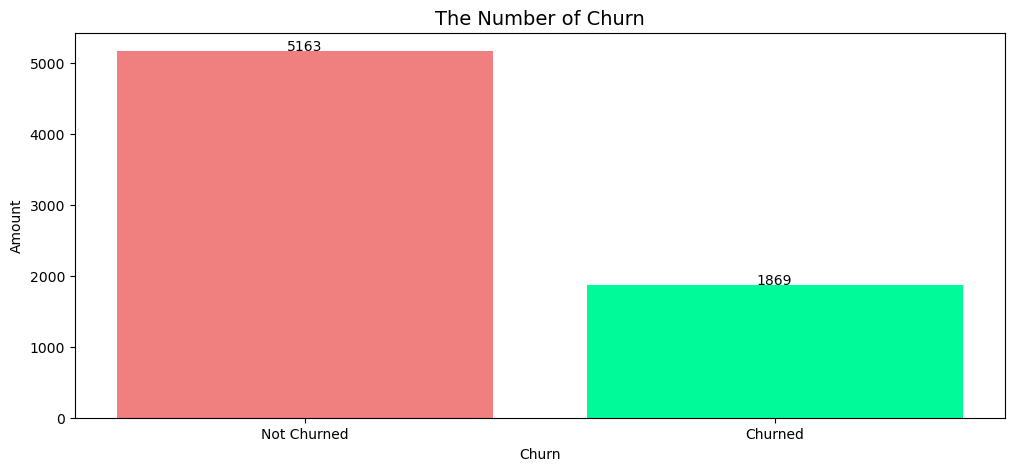

In [908]:
col = df["Churn"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Churn", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.text(x = "Not Churned", y = 5168, s = "5163", ha='center',fontsize = 10)
plt.text(x = 'Churned', y = 1874, s = "1869", ha='center',fontsize = 10)
plt.show()

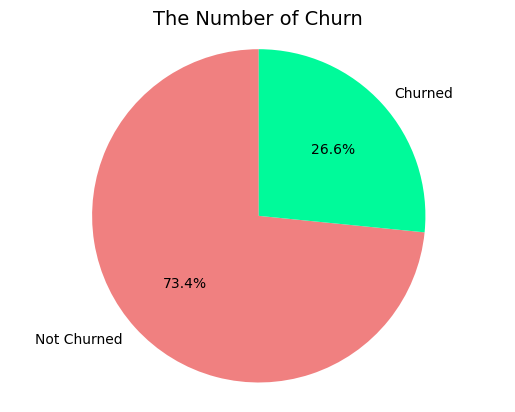

In [909]:
labels = df["Churn"].value_counts().index
sizes = df["Churn"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Churn", fontsize = 14)
plt.show()

### Checking The Number of Customers Based on The Gender

In [910]:
pd.DataFrame({'Amount' : df.groupby(["Gender"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,Gender,Amount
1,Male,3549
0,Female,3483


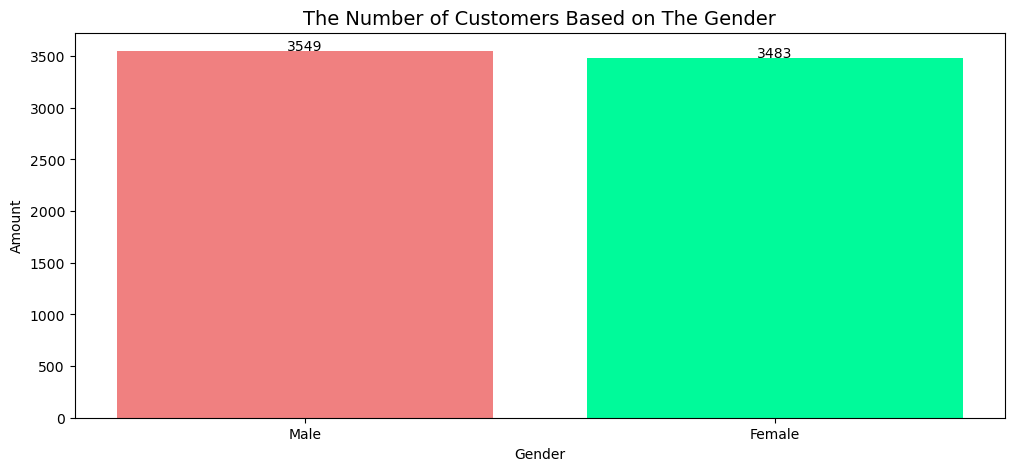

In [911]:
col = df["Gender"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The Gender", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.text(x = 'Male', y = 3551, s = "3549", ha='center',fontsize = 10)
plt.text(x = 'Female', y = 3485, s = "3483", ha='center',fontsize = 10)
plt.show()

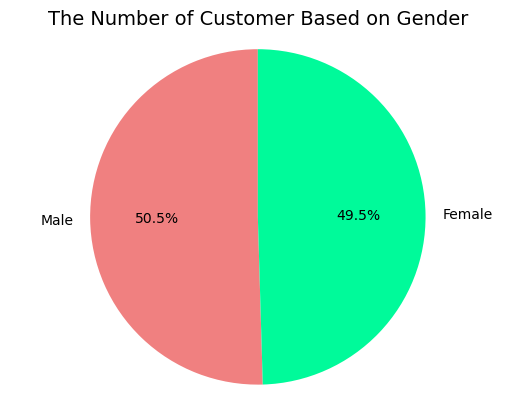

In [912]:
labels = df["Gender"].value_counts().index
sizes = df["Gender"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Gender", fontsize = 14)
plt.show()

### Looking For The Number of Gender Who Churned

In [913]:
def Amount(Column, Subject):
    Amount = pd.DataFrame({'Amount' : df.groupby([Column, Subject]).size()}).sort_values(by= Subject, ascending=False).reset_index()
    return Amount

In [914]:
gender_churn = Amount("Gender", "Churn")
gender_churn

,Gender,Churn,Amount
0,Female,Not Churned,2544
1,Male,Not Churned,2619
2,Female,Churned,939
3,Male,Churned,930


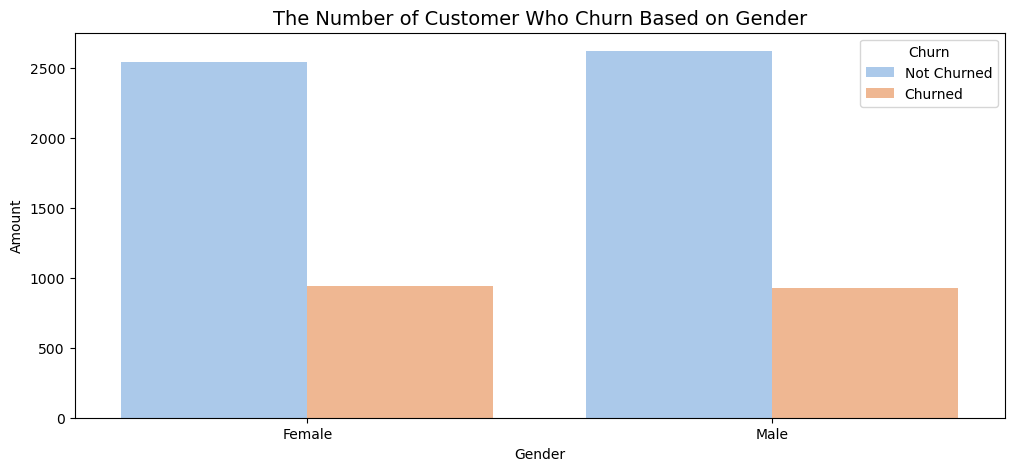

In [915]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on Gender", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The SeniorCitizen

In [916]:
pd.DataFrame({'Amount' : df.groupby(["SeniorCitizen"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,SeniorCitizen,Amount
1,Not A Senior Citizen,5890
0,A Senior Citizen,1142


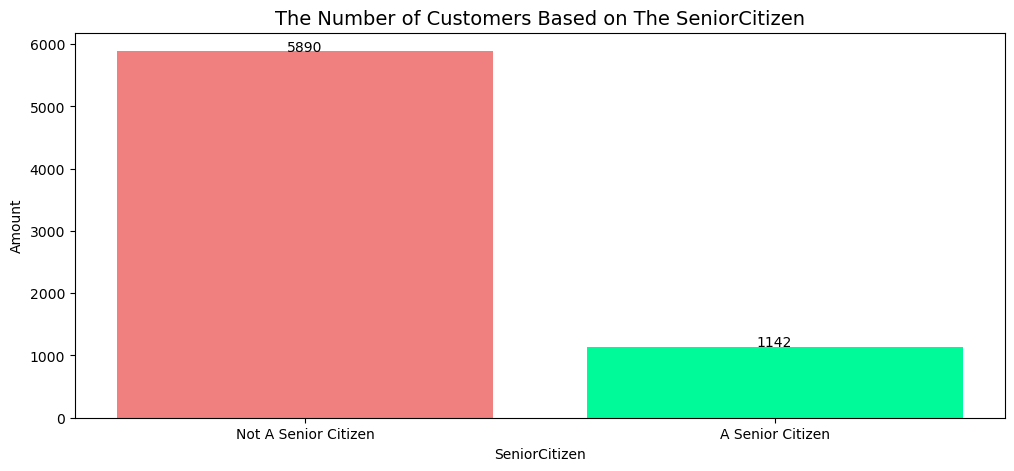

In [917]:
col = df["SeniorCitizen"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The SeniorCitizen", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("SeniorCitizen", fontsize = 10)
plt.text(x = 'Not A Senior Citizen', y = 5892, s = "5890", ha='center',fontsize = 10)
plt.text(x = 'A Senior Citizen', y = 1144, s = "1142", ha='center',fontsize = 10)
plt.show()

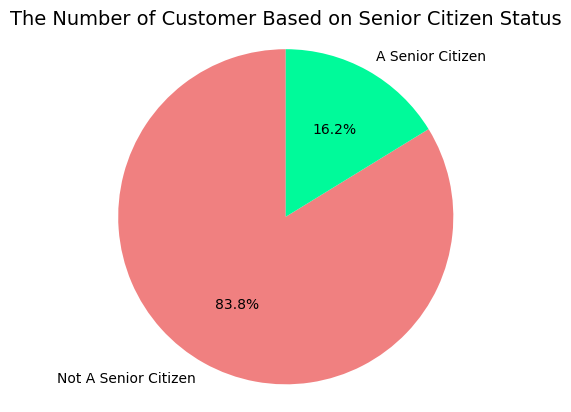

In [918]:
labels = df["SeniorCitizen"].value_counts().index
sizes = df["SeniorCitizen"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Senior Citizen Status", fontsize = 14)
plt.show()

### Looking For The Number of Senior Citizen Who Churned

In [919]:
SeniorCitizen_churn = Amount("SeniorCitizen", "Churn")
SeniorCitizen_churn

,SeniorCitizen,Churn,Amount
0,A Senior Citizen,Not Churned,666
1,Not A Senior Citizen,Not Churned,4497
2,A Senior Citizen,Churned,476
3,Not A Senior Citizen,Churned,1393


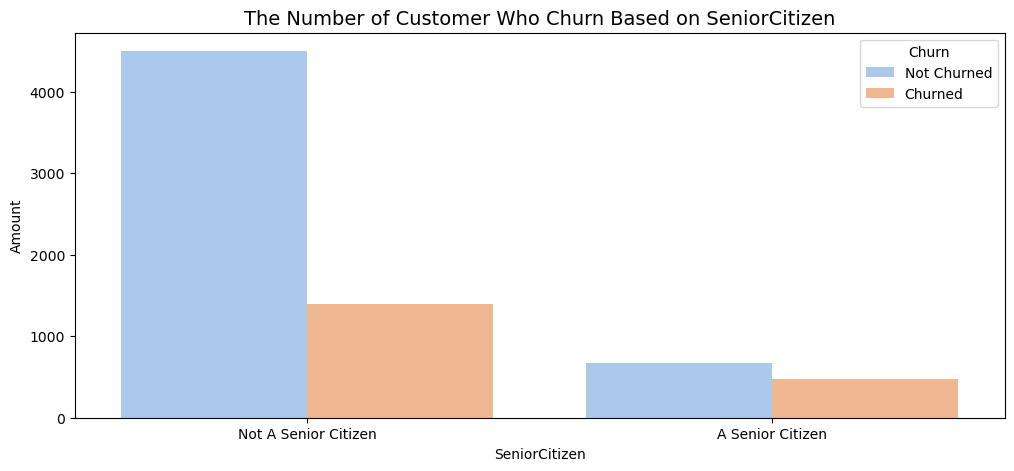

In [920]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["SeniorCitizen"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on SeniorCitizen", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("SeniorCitizen", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on Senior Citizen

In [921]:
def AmountGender(Column):
    AmountGender = pd.DataFrame({'Amount' : df.groupby([Column, "Gender"]).size()}).sort_values(by= "Gender", ascending=False).reset_index()
    return AmountGender

In [922]:
gender_SeniorCitizen = AmountGender("SeniorCitizen")
gender_SeniorCitizen

,SeniorCitizen,Gender,Amount
0,A Senior Citizen,Male,574
1,Not A Senior Citizen,Male,2975
2,A Senior Citizen,Female,568
3,Not A Senior Citizen,Female,2915


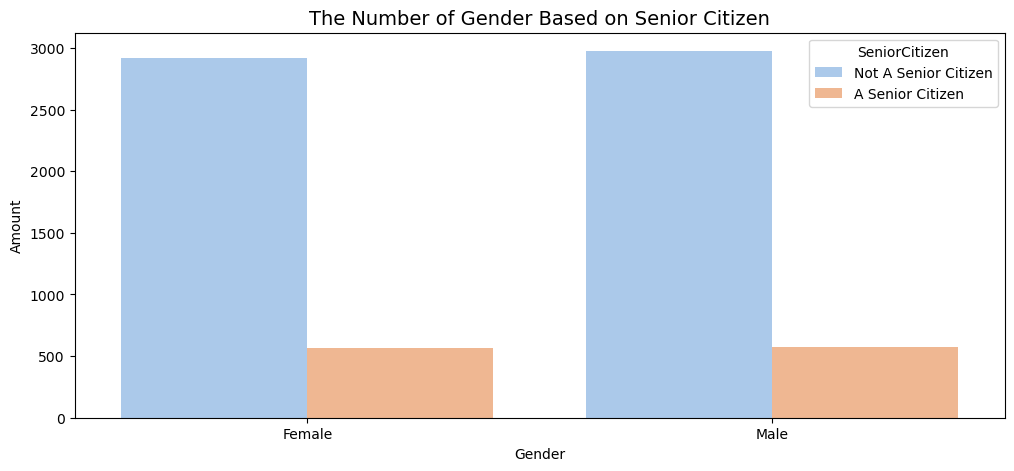

In [923]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["SeniorCitizen"], palette = "pastel")
plt.title("The Number of Gender Based on Senior Citizen", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The Partner

In [924]:
pd.DataFrame({'Amount' : df.groupby(["Partner"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,Partner,Amount
1,Not Have A Partner,3639
0,Have A Partner,3393


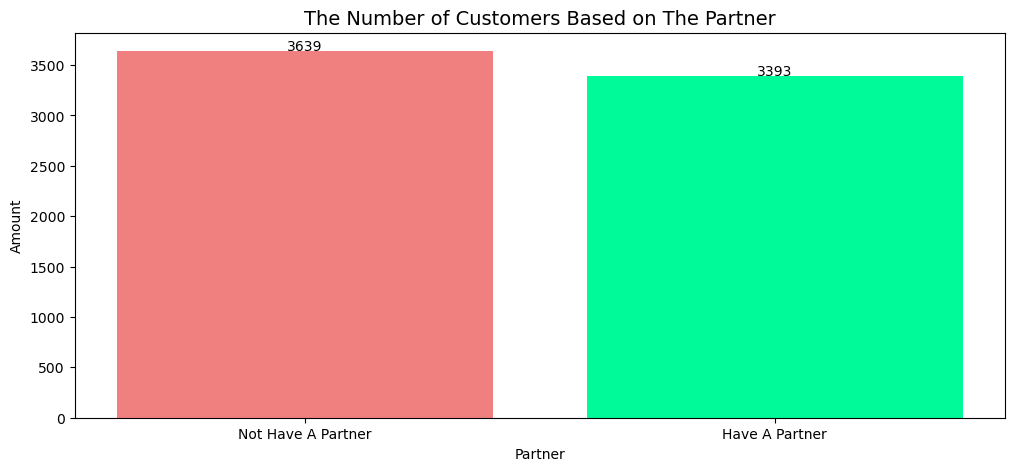

In [925]:
col = df["Partner"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The Partner", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Partner", fontsize = 10)
plt.text(x = 'Not Have A Partner', y = 3641, s = "3639", ha='center',fontsize = 10)
plt.text(x = 'Have A Partner', y = 3395, s = "3393", ha='center',fontsize = 10)
plt.show()

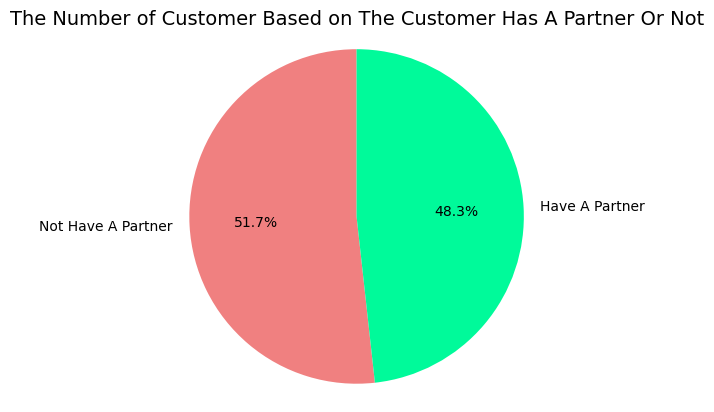

In [926]:
labels = df["Partner"].value_counts().index
sizes = df["Partner"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen"])
ax1.axis('equal')
plt.title("The Number of Customer Based on The Customer Has A Partner Or Not", fontsize = 14)
plt.show()

### Looking For The Number of Partner Who Churned

In [927]:
Partner_churn = Amount("Partner", "Churn")
Partner_churn

,Partner,Churn,Amount
0,Have A Partner,Not Churned,2724
1,Not Have A Partner,Not Churned,2439
2,Have A Partner,Churned,669
3,Not Have A Partner,Churned,1200


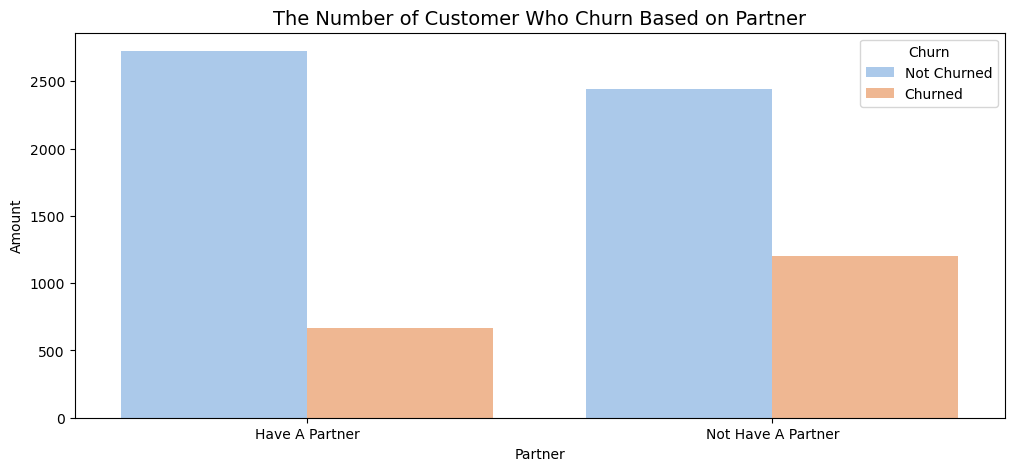

In [928]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Partner"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on Partner", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Partner", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on Partner

In [929]:
AmountGender("Partner")

,Partner,Gender,Amount
0,Have A Partner,Male,1710
1,Not Have A Partner,Male,1839
2,Have A Partner,Female,1683
3,Not Have A Partner,Female,1800


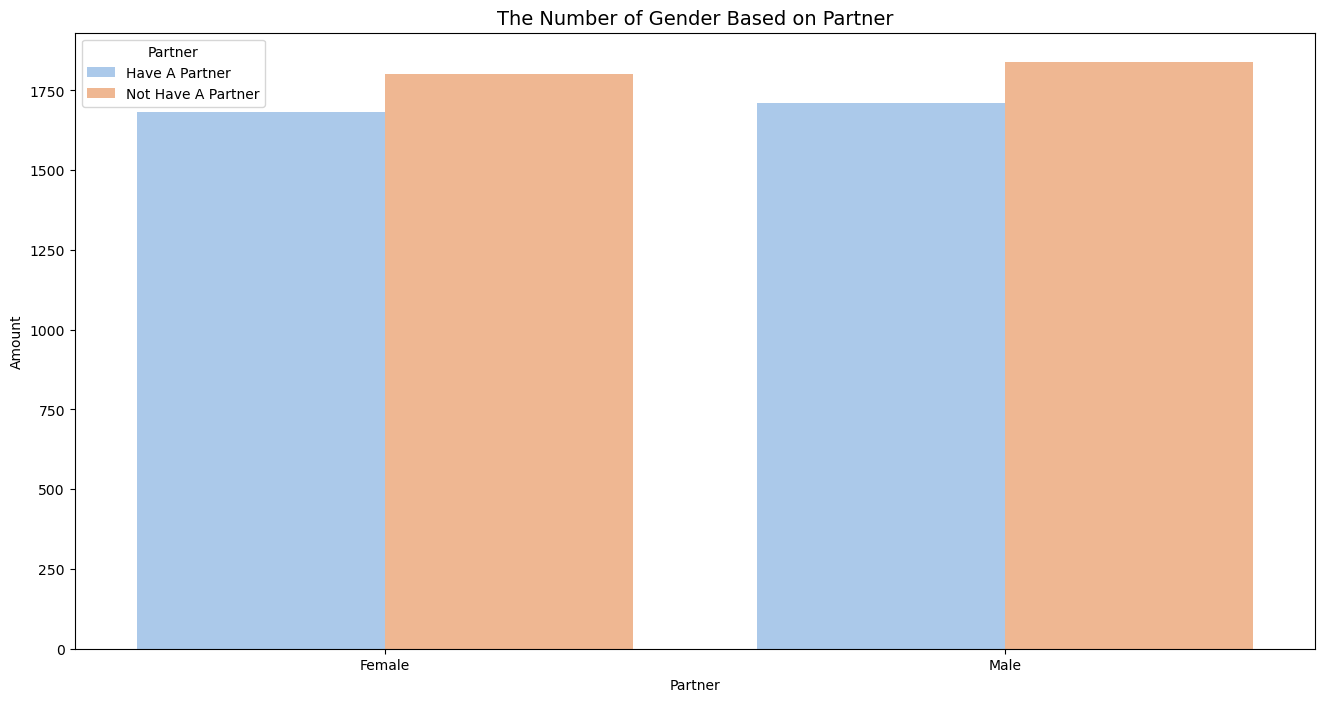

In [930]:
plt.figure(figsize = (16, 8))
sns.countplot(data = df, x = df["Gender"], hue = df["Partner"], palette = "pastel")
plt.title("The Number of Gender Based on Partner", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Partner", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The Dependents

In [931]:
pd.DataFrame({'Amount' : df.groupby(["Dependents"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,Dependents,Amount
1,Independent,4933
0,Dependent,2099


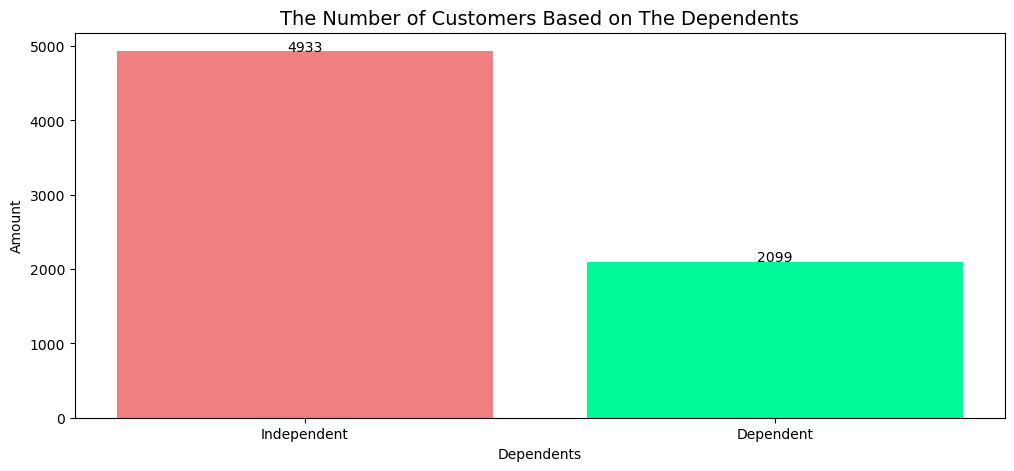

In [932]:
col = df["Dependents"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The Dependents", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Dependents", fontsize = 10)
plt.text(x = 'Independent', y = 4935, s = "4933", ha='center',fontsize = 10)
plt.text(x = 'Dependent', y = 2101, s = "2099", ha='center',fontsize = 10)
plt.show()

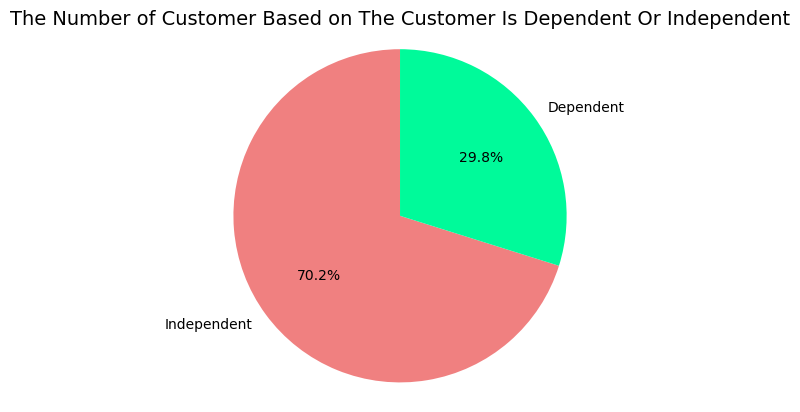

In [933]:
labels = df["Dependents"].value_counts().index
sizes = df["Dependents"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen"])
ax1.axis('equal')
plt.title("The Number of Customer Based on The Customer Is Dependent Or Independent", fontsize = 14)
plt.show()

### Looking For The Number of Dependents Who Churned

In [934]:
Dependents_churn = Amount("Dependents", "Churn")
Dependents_churn

,Dependents,Churn,Amount
0,Dependent,Not Churned,1773
1,Independent,Not Churned,3390
2,Dependent,Churned,326
3,Independent,Churned,1543


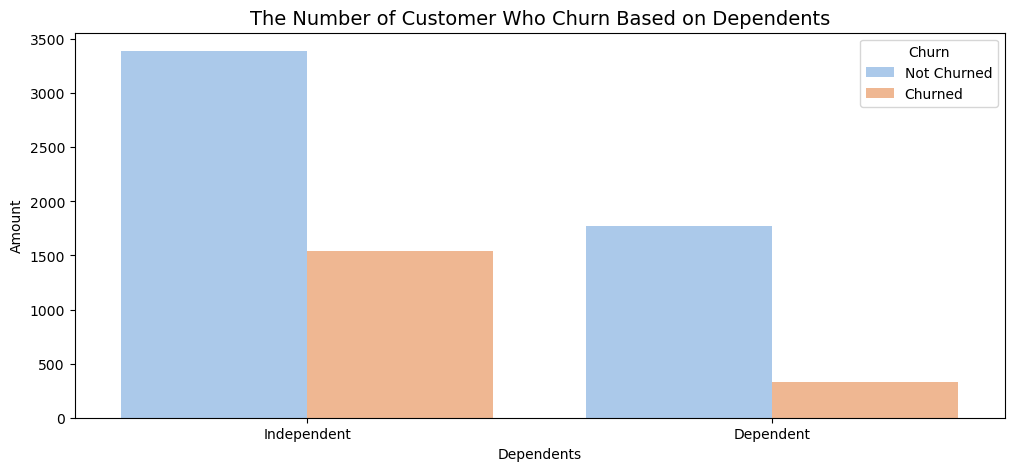

In [935]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Dependents"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on Dependents", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Dependents", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on Dependents

In [936]:
AmountGender("Dependents")

,Dependents,Gender,Amount
0,Dependent,Male,1076
1,Independent,Male,2473
2,Dependent,Female,1023
3,Independent,Female,2460


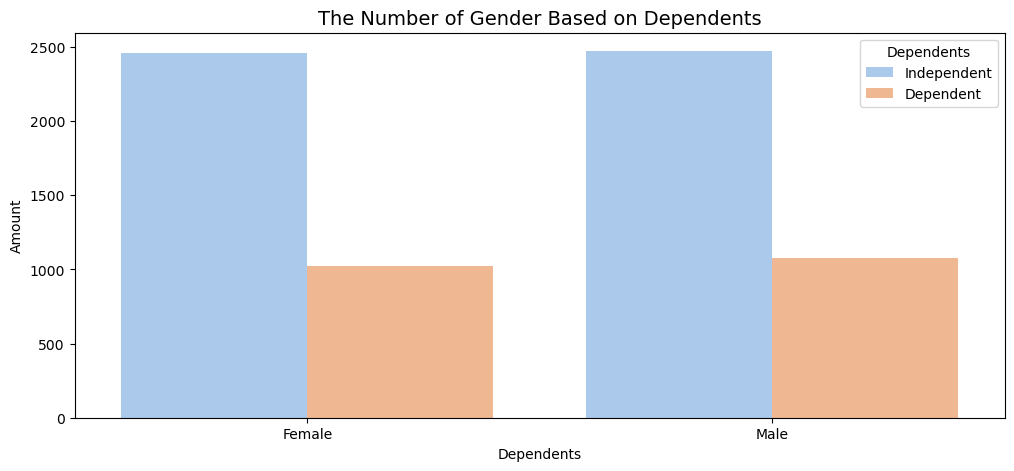

In [937]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["Dependents"], palette = "pastel")
plt.title("The Number of Gender Based on Dependents", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Dependents", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The Tenures

In [938]:
pd.DataFrame({'Amount' : df.groupby(["Tenures"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,Tenures,Amount
4,Less Than A Year,2058
5,More Than 5 Year,1483
0,1-2 Year,1047
1,2-3 Year,876
3,4-5 Year,820
2,3-4 Year,748


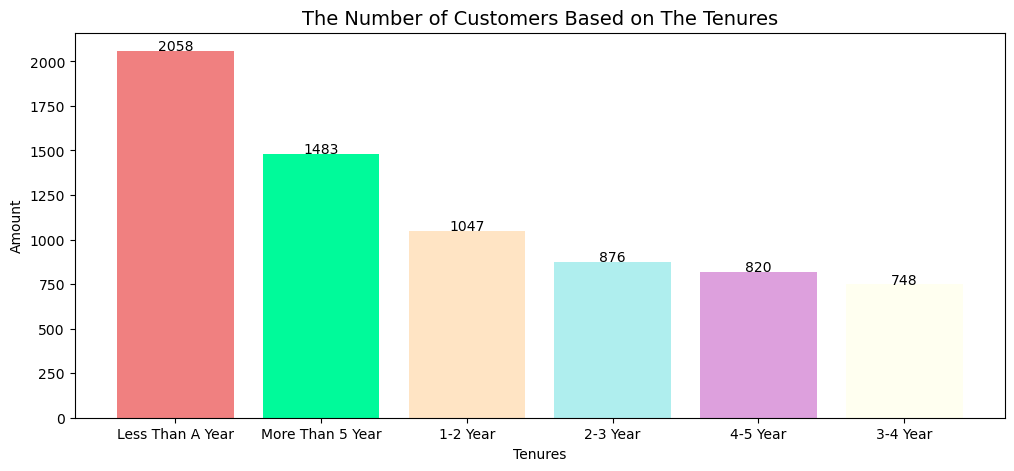

In [939]:
col = df["Tenures"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The Tenures", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Tenures", fontsize = 10)
plt.text(x = 'Less Than A Year', y = 2060, s = "2058", ha='center',fontsize = 10)
plt.text(x = 'More Than 5 Year', y = 1485, s = "1483", ha='center',fontsize = 10)
plt.text(x = '1-2 Year', y = 1049, s = "1047", ha='center',fontsize = 10)
plt.text(x = '2-3 Year', y = 878, s = "876", ha='center',fontsize = 10)
plt.text(x = '3-4 Year', y = 750, s = "748", ha='center',fontsize = 10)
plt.text(x = '4-5 Year', y = 822, s = "820", ha='center',fontsize = 10)
plt.show()

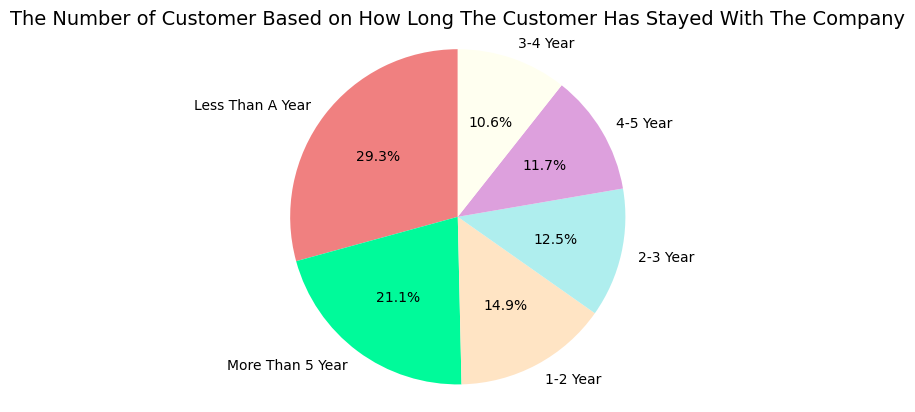

In [940]:
labels = df["Tenures"].value_counts().index
sizes = df["Tenures"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on How Long The Customer Has Stayed With The Company", fontsize = 14)
plt.show()

### Looking For The Number of Tenures Who Churned

In [941]:
Tenures_churn = Amount("Tenures", "Churn")
Tenures_churn

,Tenures,Churn,Amount
0,1-2 Year,Not Churned,738
1,2-3 Year,Not Churned,683
2,3-4 Year,Not Churned,602
3,4-5 Year,Not Churned,697
4,Less Than A Year,Not Churned,1059
5,More Than 5 Year,Not Churned,1384
6,1-2 Year,Churned,309
7,2-3 Year,Churned,193
8,3-4 Year,Churned,146
9,4-5 Year,Churned,123


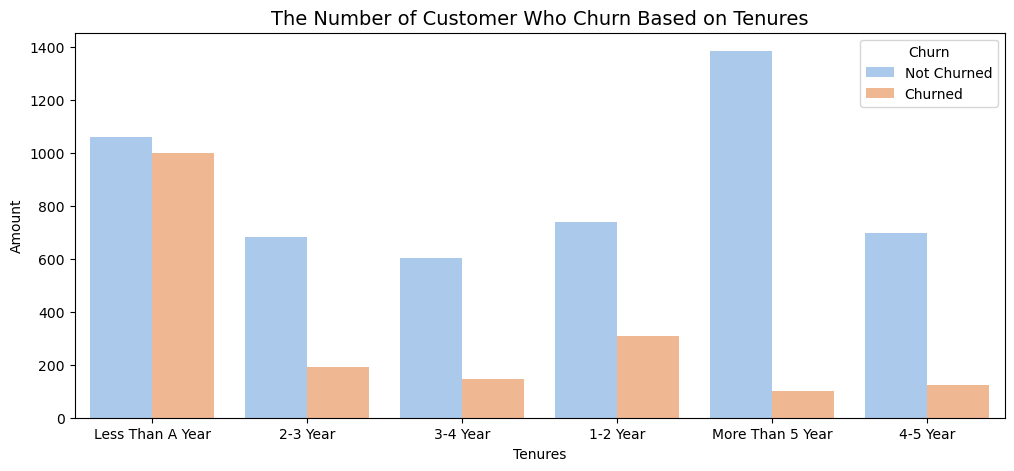

In [942]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Tenures"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on Tenures", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Tenures", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on Tenures

In [943]:
AmountGender("Tenures")

,Tenures,Gender,Amount
0,1-2 Year,Male,514
1,2-3 Year,Male,460
2,3-4 Year,Male,364
3,4-5 Year,Male,398
4,Less Than A Year,Male,1042
5,More Than 5 Year,Male,771
6,1-2 Year,Female,533
7,2-3 Year,Female,416
8,3-4 Year,Female,384
9,4-5 Year,Female,422


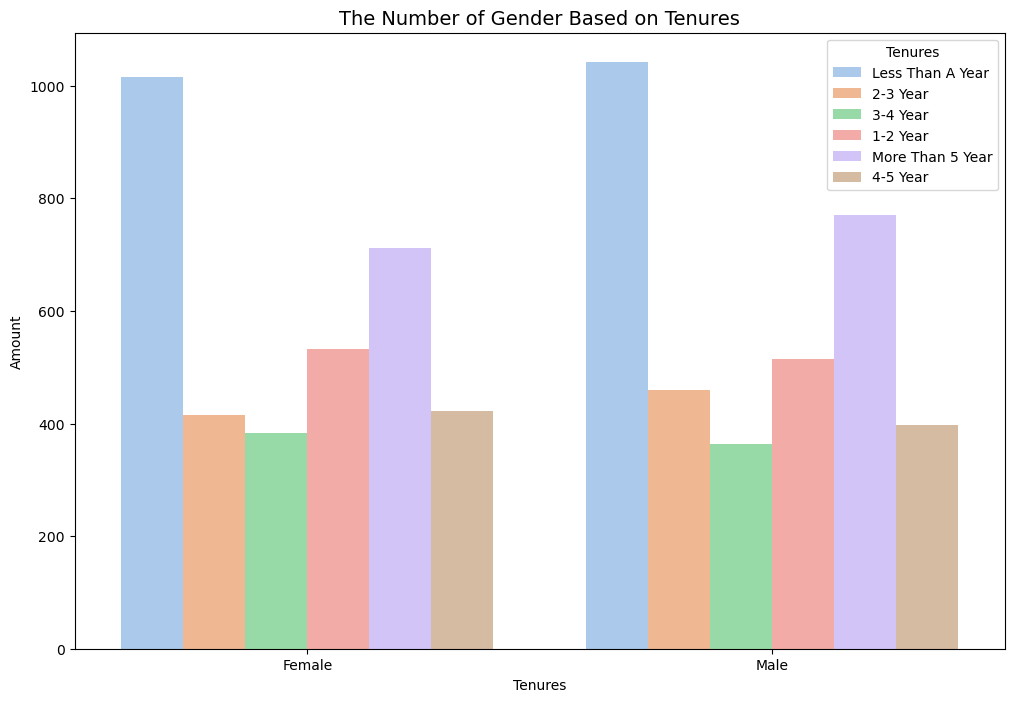

In [944]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = df["Gender"], hue = df["Tenures"], palette = "pastel")
plt.title("The Number of Gender Based on Tenures", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Tenures", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The PhoneService

In [945]:
pd.DataFrame({'Amount' : df.groupby(["PhoneService"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,PhoneService,Amount
0,Have A Phone Service,6352
1,Not Have A Phone Service,680


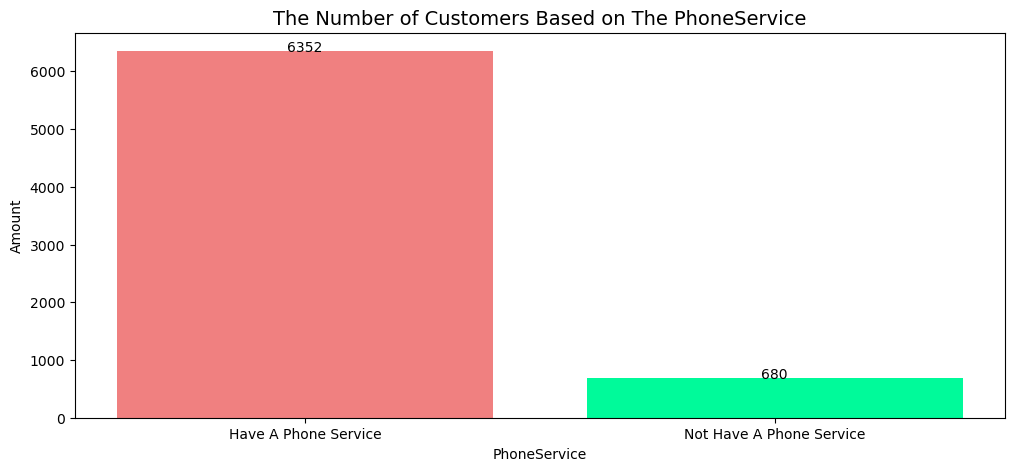

In [946]:
col = df["PhoneService"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The PhoneService", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PhoneService", fontsize = 10)
plt.text(x = 'Have A Phone Service', y = 6354, s = "6352", ha='center',fontsize = 10)
plt.text(x = 'Not Have A Phone Service', y = 682, s = "680", ha='center',fontsize = 10)
plt.show()

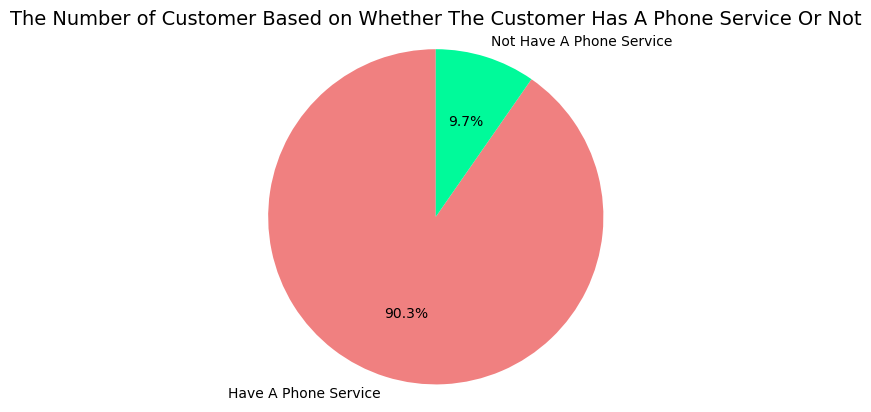

In [947]:
labels = df["PhoneService"].value_counts().index
sizes = df["PhoneService"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has A Phone Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of PhoneService Who Churned

In [948]:
PhoneService_churn = Amount("PhoneService", "Churn")
PhoneService_churn

,PhoneService,Churn,Amount
0,Have A Phone Service,Not Churned,4653
1,Not Have A Phone Service,Not Churned,510
2,Have A Phone Service,Churned,1699
3,Not Have A Phone Service,Churned,170


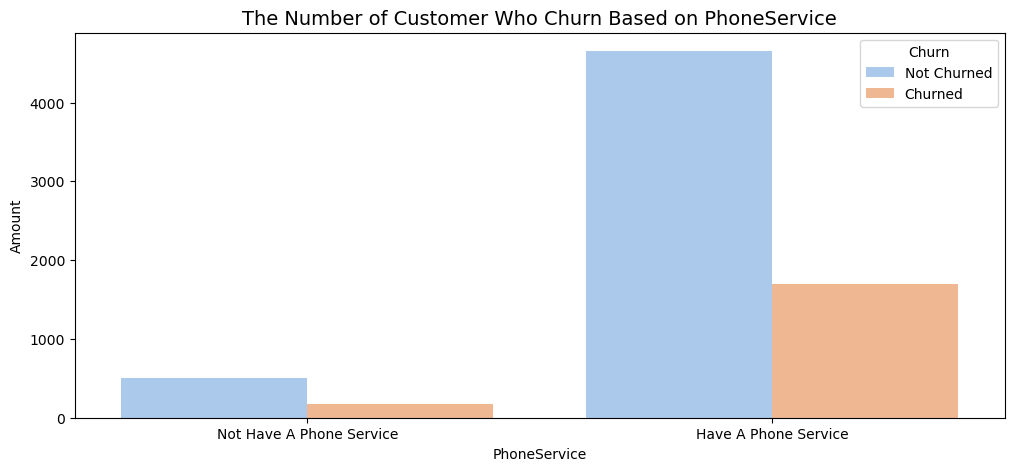

In [949]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["PhoneService"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on PhoneService", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PhoneService", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on PhoneService

In [950]:
AmountGender("PhoneService")

,PhoneService,Gender,Amount
0,Have A Phone Service,Male,3198
1,Not Have A Phone Service,Male,351
2,Have A Phone Service,Female,3154
3,Not Have A Phone Service,Female,329


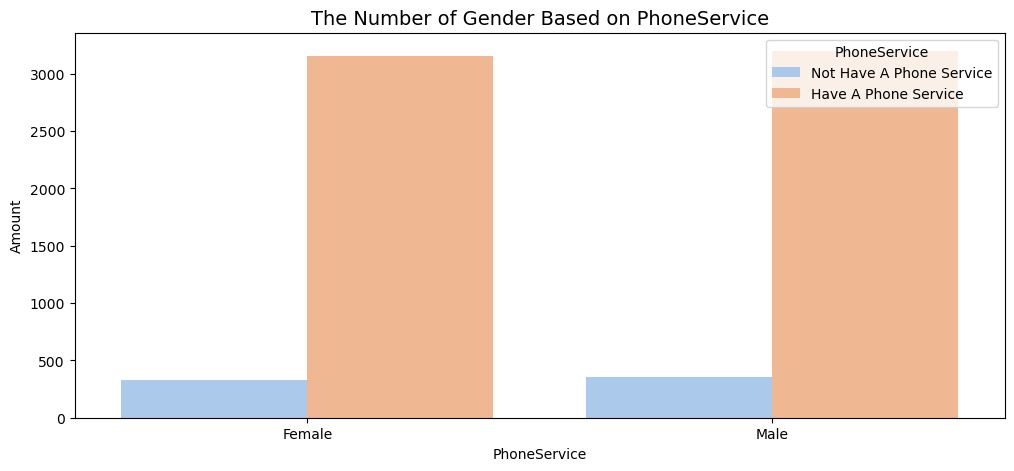

In [951]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["PhoneService"], palette = "pastel")
plt.title("The Number of Gender Based on PhoneService", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PhoneService", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The MultipleLines

In [952]:
pd.DataFrame({'Amount' : df.groupby(["MultipleLines"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,MultipleLines,Amount
1,Not Have A Multiple Lines Service,3385
0,Have A Multiple Lines Service,2967
2,Not Have A Phone Service,680


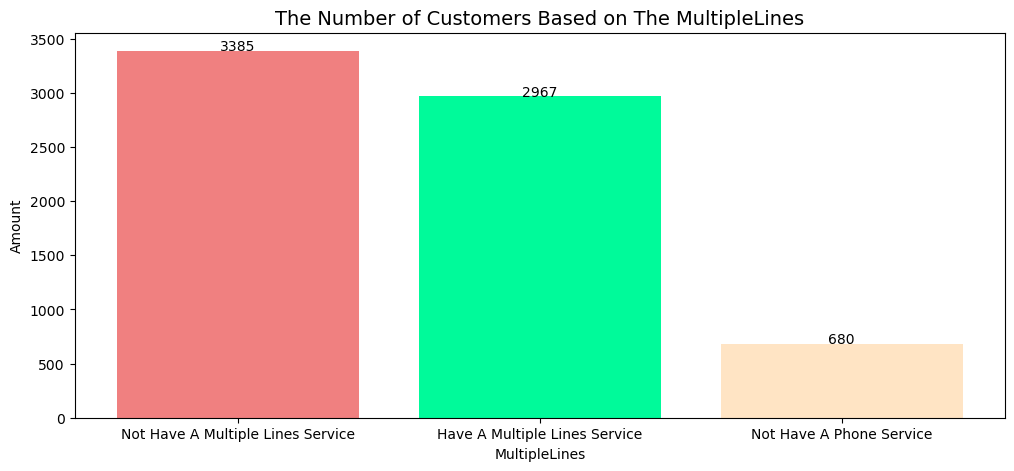

In [953]:
col = df["MultipleLines"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The MultipleLines", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("MultipleLines", fontsize = 10)
plt.text(x = 'Not Have A Multiple Lines Service', y = 3387, s = "3385", ha='center',fontsize = 10)
plt.text(x = 'Have A Multiple Lines Service', y = 2969, s = "2967", ha='center',fontsize = 10)
plt.text(x = 'Not Have A Phone Service', y = 682, s = "680", ha='center',fontsize = 10)
plt.show()

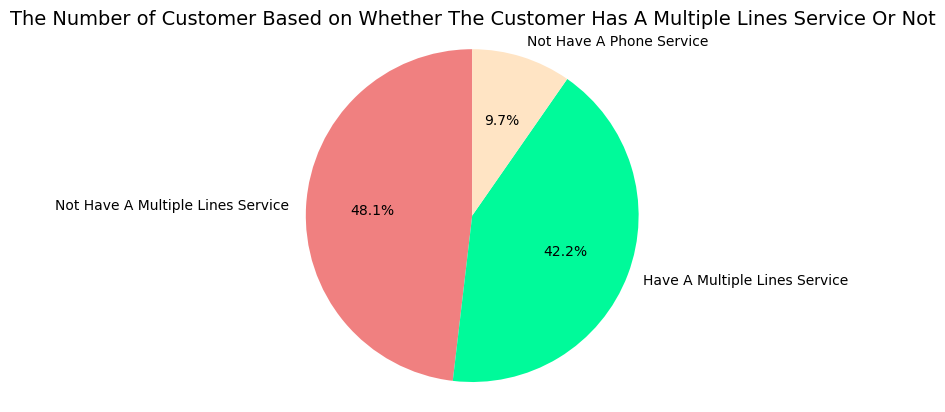

In [954]:
labels = df["MultipleLines"].value_counts().index
sizes = df["MultipleLines"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has A Multiple Lines Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of MultipleLines Who Churned

In [955]:
MultipleLines_churn = Amount("MultipleLines", "Churn")
MultipleLines_churn

,MultipleLines,Churn,Amount
0,Have A Multiple Lines Service,Not Churned,2117
1,Not Have A Multiple Lines Service,Not Churned,2536
2,Not Have A Phone Service,Not Churned,510
3,Have A Multiple Lines Service,Churned,850
4,Not Have A Multiple Lines Service,Churned,849
5,Not Have A Phone Service,Churned,170


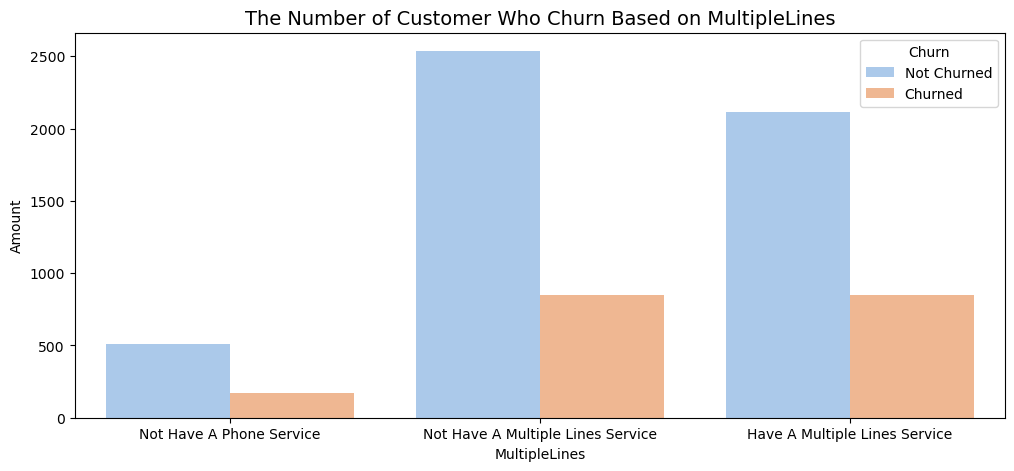

In [956]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["MultipleLines"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on MultipleLines", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("MultipleLines", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on MultipleLines

In [957]:
AmountGender("MultipleLines")

,MultipleLines,Gender,Amount
0,Have A Multiple Lines Service,Male,1482
1,Not Have A Multiple Lines Service,Male,1716
2,Not Have A Phone Service,Male,351
3,Have A Multiple Lines Service,Female,1485
4,Not Have A Multiple Lines Service,Female,1669
5,Not Have A Phone Service,Female,329


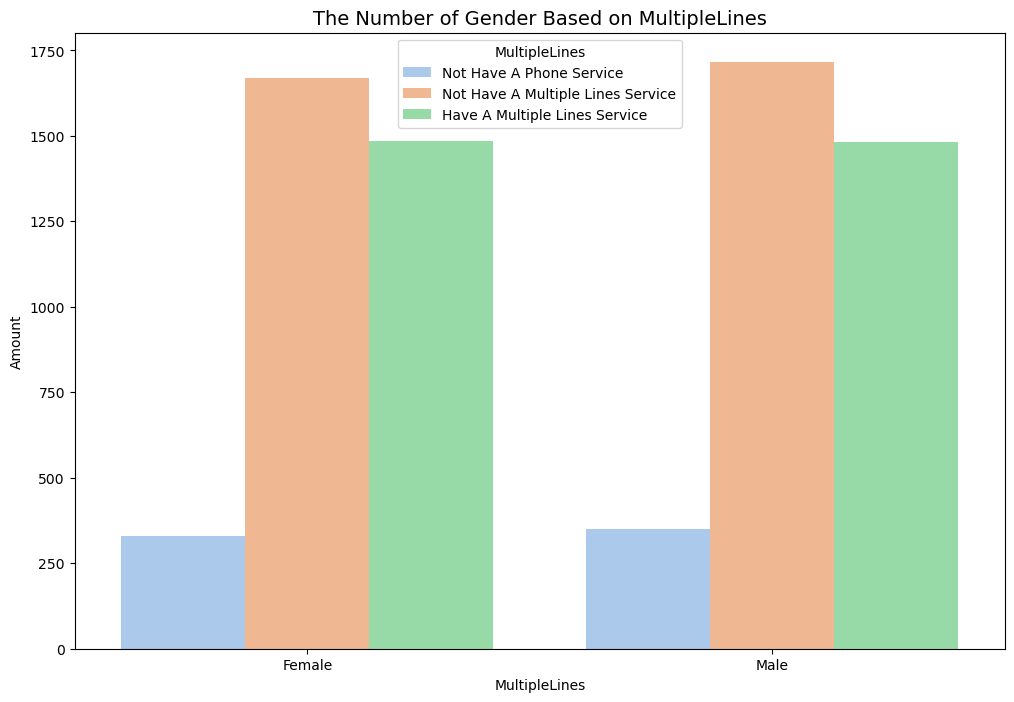

In [958]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = df["Gender"], hue = df["MultipleLines"], palette = "pastel")
plt.title("The Number of Gender Based on MultipleLines", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("MultipleLines", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The InternetService

In [959]:
pd.DataFrame({'Amount' : df.groupby(["InternetService"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,InternetService,Amount
1,Fiber Optic,3096
0,DSL,2416
2,Not Have An Internet Service,1520


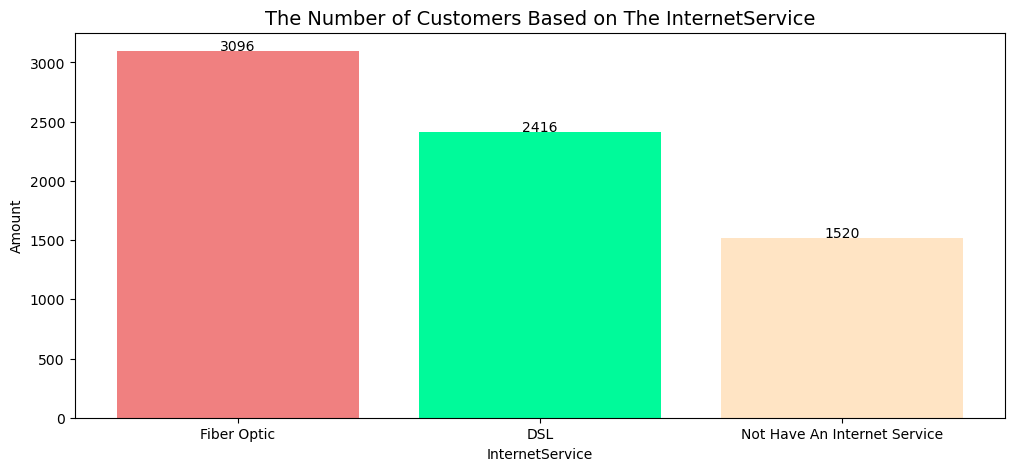

In [960]:
col = df["InternetService"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The InternetService", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("InternetService", fontsize = 10)
plt.text(x = 'Fiber Optic', y = 3098, s = "3096", ha='center',fontsize = 10)
plt.text(x = 'DSL', y = 2418, s = "2416", ha='center',fontsize = 10)
plt.text(x = 'Not Have An Internet Service', y = 1522, s = "1520", ha='center',fontsize = 10)
plt.show()

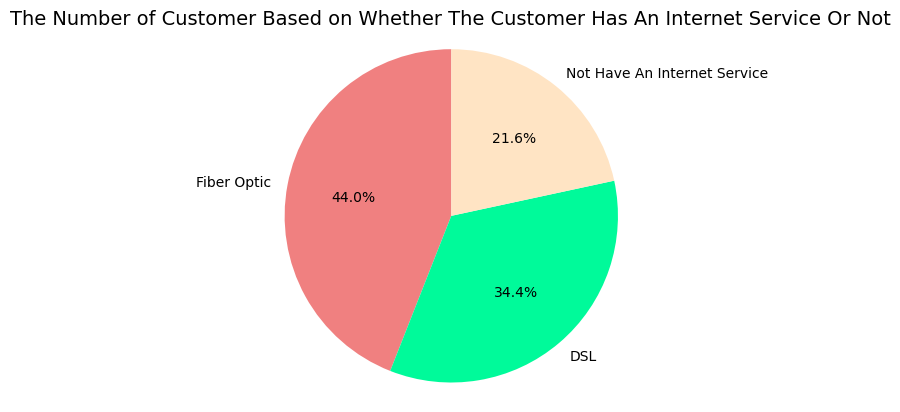

In [961]:
labels = df["InternetService"].value_counts().index
sizes = df["InternetService"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has An Internet Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of InternetService Who Churned

In [962]:
InternetService_churn = Amount("InternetService", "Churn")
InternetService_churn

,InternetService,Churn,Amount
0,DSL,Not Churned,1957
1,Fiber Optic,Not Churned,1799
2,Not Have An Internet Service,Not Churned,1407
3,DSL,Churned,459
4,Fiber Optic,Churned,1297
5,Not Have An Internet Service,Churned,113


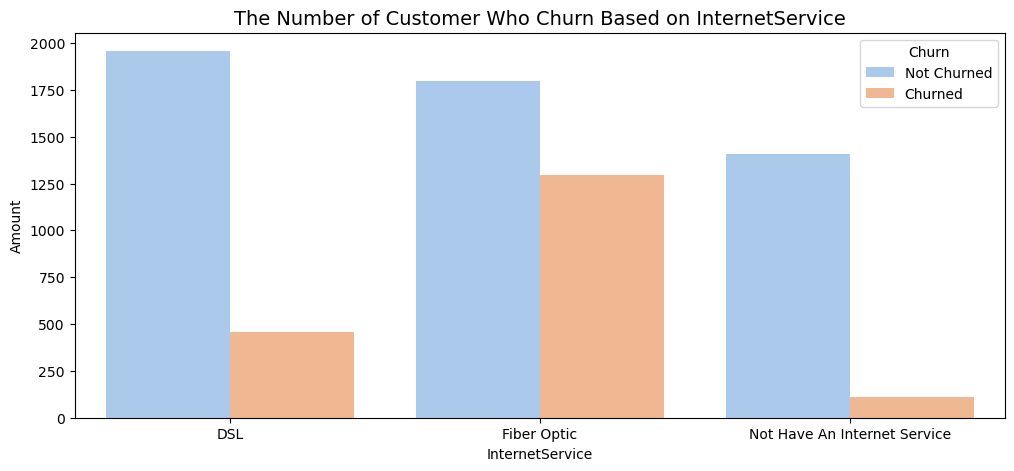

In [963]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["InternetService"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on InternetService", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("InternetService", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on InternetService

In [964]:
AmountGender("InternetService")

,InternetService,Gender,Amount
0,DSL,Male,1232
1,Fiber Optic,Male,1543
2,Not Have An Internet Service,Male,774
3,DSL,Female,1184
4,Fiber Optic,Female,1553
5,Not Have An Internet Service,Female,746


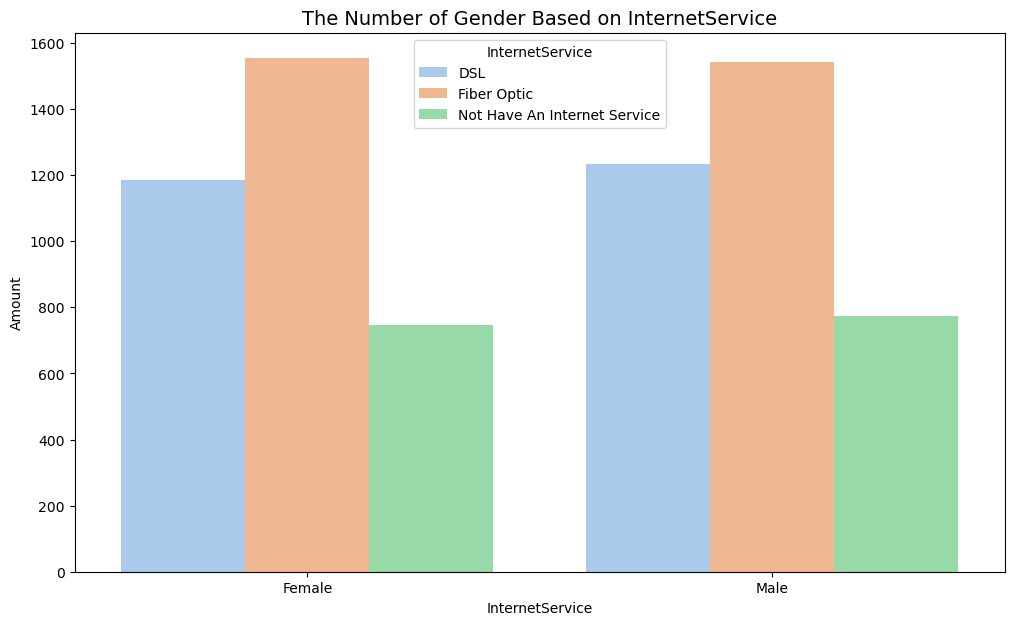

In [965]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df, x = df["Gender"], hue = df["InternetService"], palette = "pastel")
plt.title("The Number of Gender Based on InternetService", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("InternetService", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The OnlineSecurity

In [966]:
pd.DataFrame({'Amount' : df.groupby(["OnlineSecurity"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,OnlineSecurity,Amount
2,Not Have An Online Security Service,3497
0,Have An Online Security Service,2015
1,Not Have An Internet Service,1520


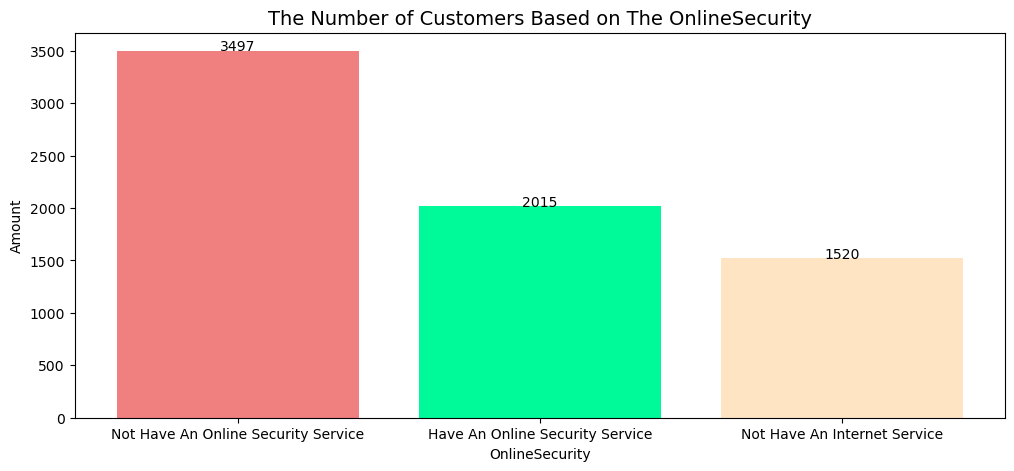

In [967]:
col = df["OnlineSecurity"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The OnlineSecurity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("OnlineSecurity", fontsize = 10)
plt.text(x = 'Not Have An Online Security Service', y = 3499, s = "3497", ha='center',fontsize = 10)
plt.text(x = 'Have An Online Security Service', y = 2017, s = "2015", ha='center',fontsize = 10)
plt.text(x = 'Not Have An Internet Service', y = 1522, s = "1520", ha='center',fontsize = 10)
plt.show()

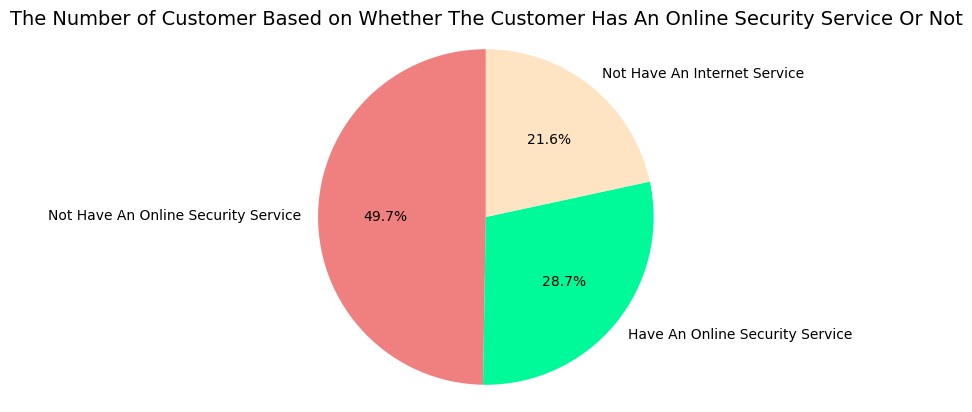

In [968]:
labels = df["OnlineSecurity"].value_counts().index
sizes = df["OnlineSecurity"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has An Online Security Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of OnlineSecurity Who Churned

In [969]:
OnlineSecurity_churn = Amount("OnlineSecurity", "Churn")
OnlineSecurity_churn

,OnlineSecurity,Churn,Amount
0,Have An Online Security Service,Not Churned,1720
1,Not Have An Internet Service,Not Churned,1407
2,Not Have An Online Security Service,Not Churned,2036
3,Have An Online Security Service,Churned,295
4,Not Have An Internet Service,Churned,113
5,Not Have An Online Security Service,Churned,1461


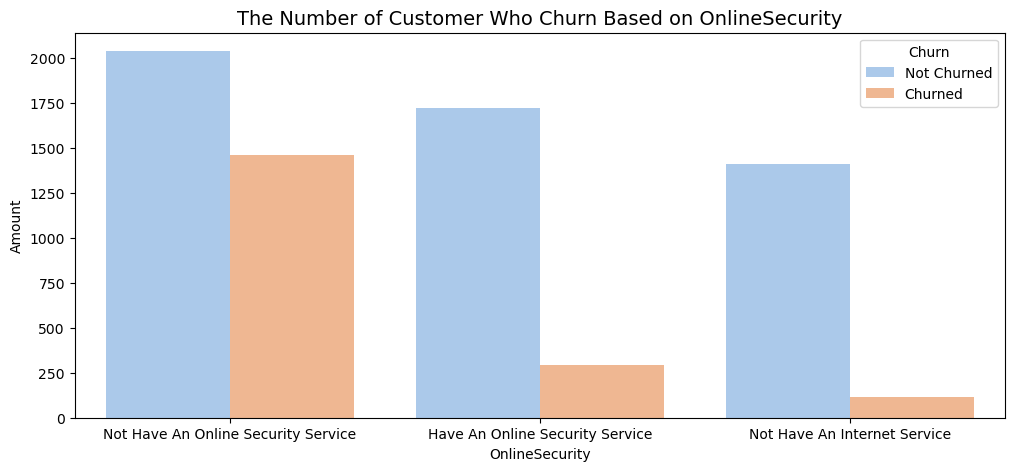

In [970]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["OnlineSecurity"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on OnlineSecurity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("OnlineSecurity", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on OnlineSecurity

In [971]:
AmountGender("OnlineSecurity")

,OnlineSecurity,Gender,Amount
0,Have An Online Security Service,Male,991
1,Not Have An Internet Service,Male,774
2,Not Have An Online Security Service,Male,1784
3,Have An Online Security Service,Female,1024
4,Not Have An Internet Service,Female,746
5,Not Have An Online Security Service,Female,1713


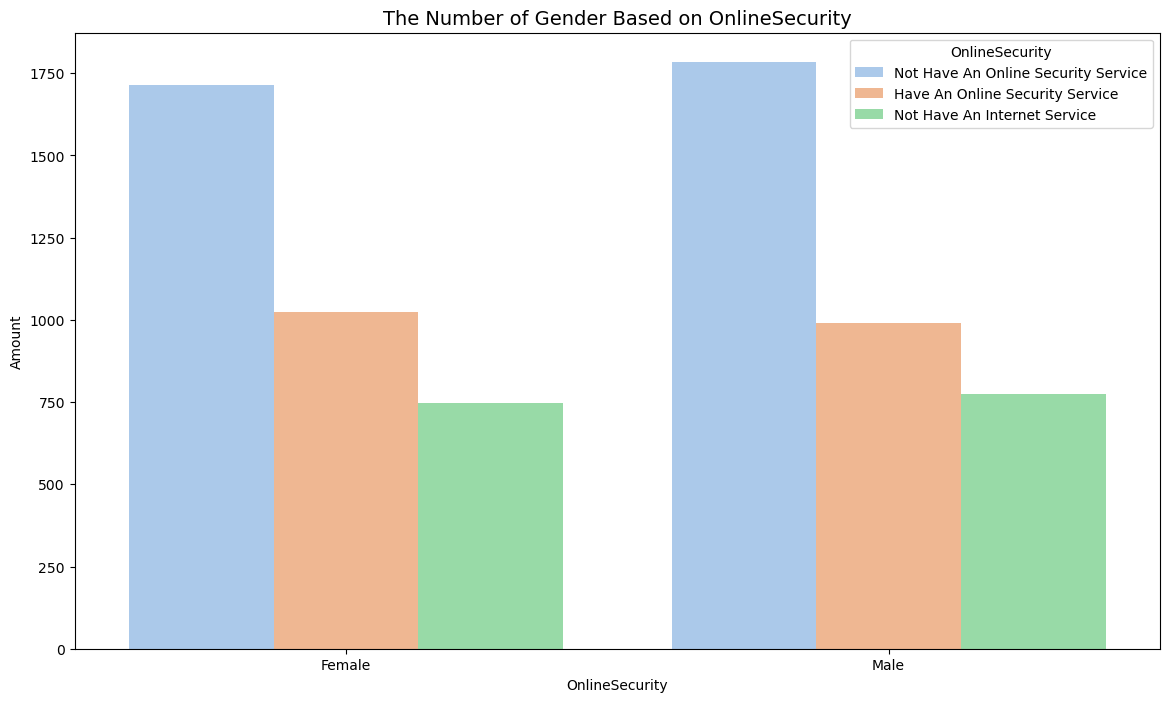

In [972]:
plt.figure(figsize = (14, 8))
sns.countplot(data = df, x = df["Gender"], hue = df["OnlineSecurity"], palette = "pastel")
plt.title("The Number of Gender Based on OnlineSecurity", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("OnlineSecurity", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The OnlineBackup

In [973]:
pd.DataFrame({'Amount' : df.groupby(["OnlineBackup"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,OnlineBackup,Amount
2,Not Have An Online Backup Service,3087
0,Have An Online Backup Service,2425
1,Not Have An Internet Service,1520


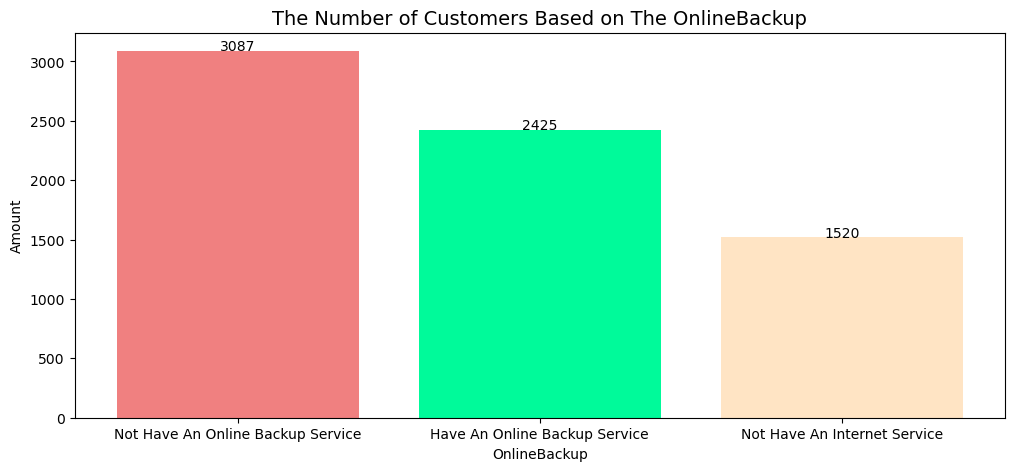

In [974]:
col = df["OnlineBackup"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The OnlineBackup", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("OnlineBackup", fontsize = 10)
plt.text(x = 'Not Have An Online Backup Service', y = 3089, s = "3087", ha='center',fontsize = 10)
plt.text(x = 'Have An Online Backup Service', y = 2427, s = "2425", ha='center',fontsize = 10)
plt.text(x = 'Not Have An Internet Service', y = 1522, s = "1520", ha='center',fontsize = 10)
plt.show()

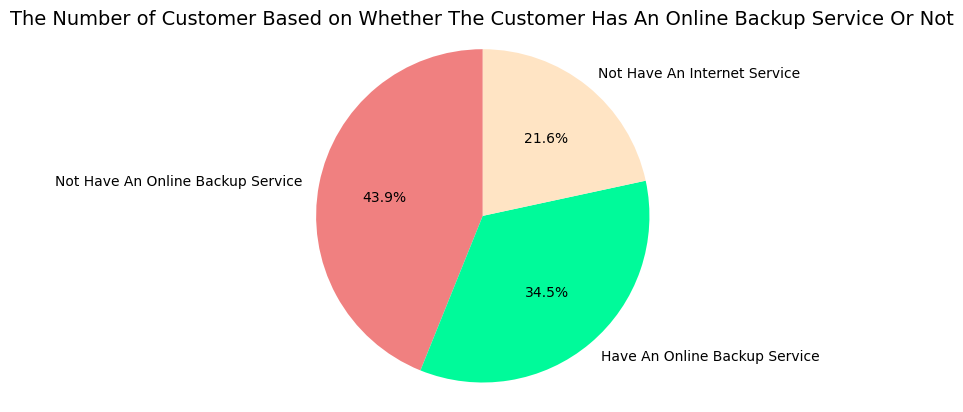

In [975]:
labels = df["OnlineBackup"].value_counts().index
sizes = df["OnlineBackup"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has An Online Backup Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of OnlineBackup Who Churned

In [976]:
OnlineBackup_churn = Amount("OnlineBackup", "Churn")
OnlineBackup_churn

,OnlineBackup,Churn,Amount
0,Have An Online Backup Service,Not Churned,1902
1,Not Have An Internet Service,Not Churned,1407
2,Not Have An Online Backup Service,Not Churned,1854
3,Have An Online Backup Service,Churned,523
4,Not Have An Internet Service,Churned,113
5,Not Have An Online Backup Service,Churned,1233


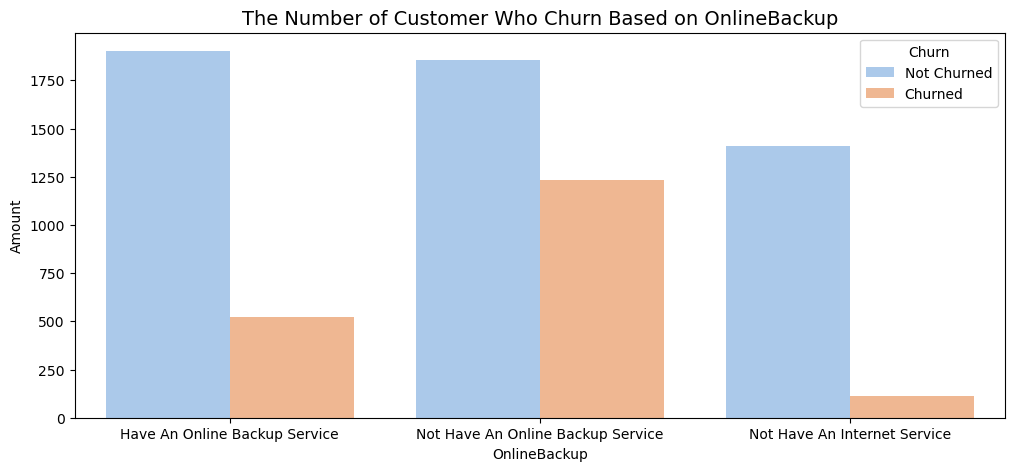

In [977]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["OnlineBackup"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on OnlineBackup", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("OnlineBackup", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on OnlineBackup

In [978]:
AmountGender("OnlineBackup")

,OnlineBackup,Gender,Amount
0,Have An Online Backup Service,Male,1202
1,Not Have An Internet Service,Male,774
2,Not Have An Online Backup Service,Male,1573
3,Have An Online Backup Service,Female,1223
4,Not Have An Internet Service,Female,746
5,Not Have An Online Backup Service,Female,1514


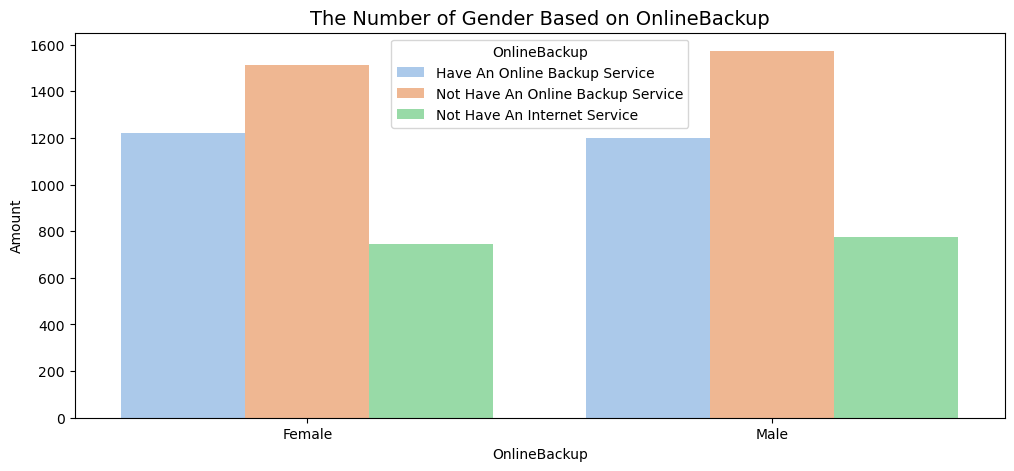

In [979]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["OnlineBackup"], palette = "pastel")
plt.title("The Number of Gender Based on OnlineBackup", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("OnlineBackup", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The DeviceProtection

In [980]:
pd.DataFrame({'Amount' : df.groupby(["DeviceProtection"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,DeviceProtection,Amount
1,Not Have A Device Protection Service,3094
0,Have A Device Protection Service,2418
2,Not Have An Internet Service,1520


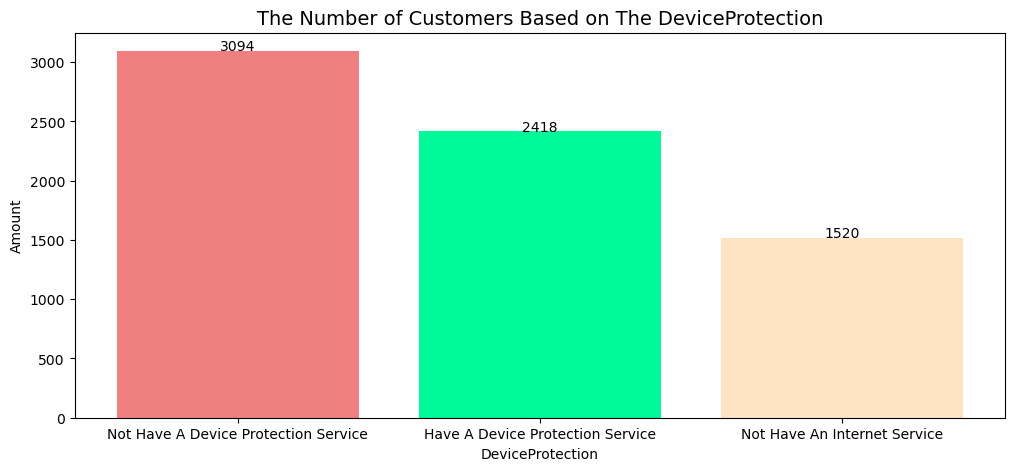

In [981]:
col = df["DeviceProtection"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The DeviceProtection", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("DeviceProtection", fontsize = 10)
plt.text(x = 'Not Have A Device Protection Service', y = 3096, s = "3094", ha='center',fontsize = 10)
plt.text(x = 'Have A Device Protection Service', y = 2420, s = "2418", ha='center',fontsize = 10)
plt.text(x = 'Not Have An Internet Service', y = 1522, s = "1520", ha='center',fontsize = 10)
plt.show()

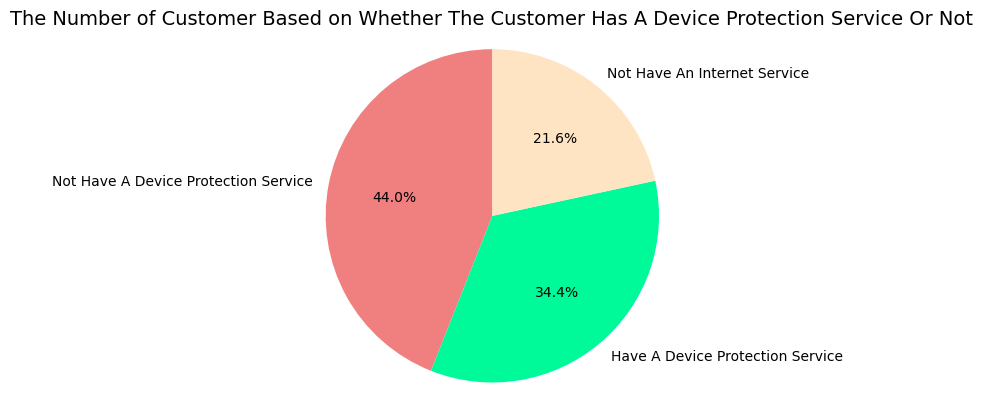

In [982]:
labels = df["DeviceProtection"].value_counts().index
sizes = df["DeviceProtection"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has A Device Protection Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of DeviceProtection Who Churned

In [983]:
DeviceProtection_churn = Amount("DeviceProtection", "Churn")
DeviceProtection_churn

,DeviceProtection,Churn,Amount
0,Have A Device Protection Service,Not Churned,1873
1,Not Have A Device Protection Service,Not Churned,1883
2,Not Have An Internet Service,Not Churned,1407
3,Have A Device Protection Service,Churned,545
4,Not Have A Device Protection Service,Churned,1211
5,Not Have An Internet Service,Churned,113


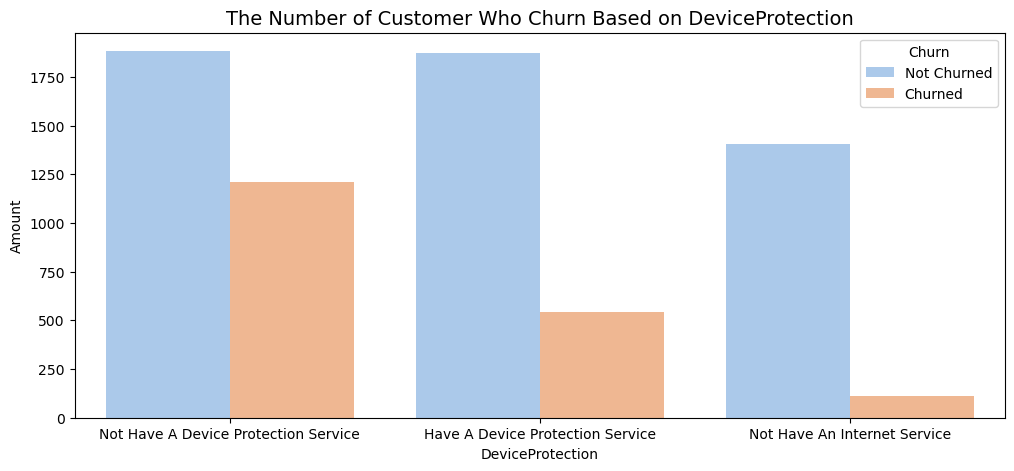

In [984]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["DeviceProtection"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on DeviceProtection", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("DeviceProtection", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on DeviceProtection

In [985]:
AmountGender("DeviceProtection")

,DeviceProtection,Gender,Amount
0,Have A Device Protection Service,Male,1219
1,Not Have A Device Protection Service,Male,1556
2,Not Have An Internet Service,Male,774
3,Have A Device Protection Service,Female,1199
4,Not Have A Device Protection Service,Female,1538
5,Not Have An Internet Service,Female,746


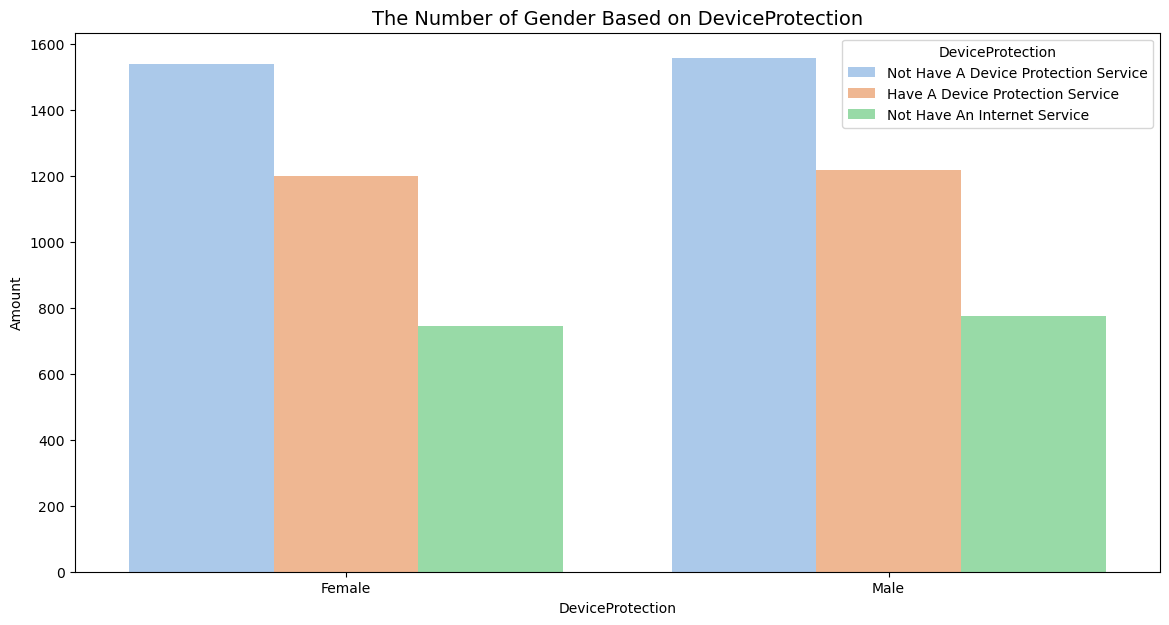

In [986]:
plt.figure(figsize = (14, 7))
sns.countplot(data = df, x = df["Gender"], hue = df["DeviceProtection"], palette = "pastel")
plt.title("The Number of Gender Based on DeviceProtection", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("DeviceProtection", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The TechSupport

In [987]:
pd.DataFrame({'Amount' : df.groupby(["TechSupport"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,TechSupport,Amount
1,Not Have A Tech Support Service,3472
0,Have A Tech Support Service,2040
2,Not Have An Internet Service,1520


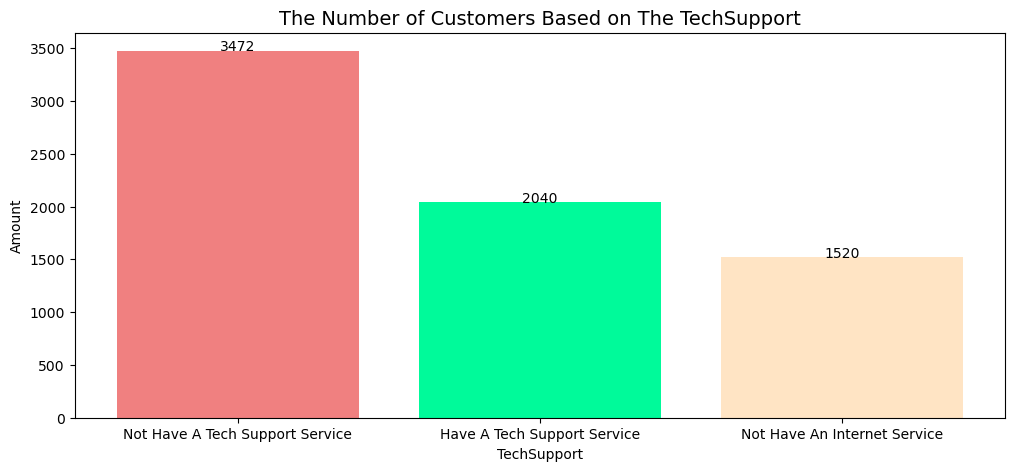

In [988]:
col = df["TechSupport"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The TechSupport", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("TechSupport", fontsize = 10)
plt.text(x = 'Not Have A Tech Support Service', y = 3474, s = "3472", ha='center',fontsize = 10)
plt.text(x = 'Have A Tech Support Service', y = 2042, s = "2040", ha='center',fontsize = 10)
plt.text(x = 'Not Have An Internet Service', y = 1522, s = "1520", ha='center',fontsize = 10)
plt.show()

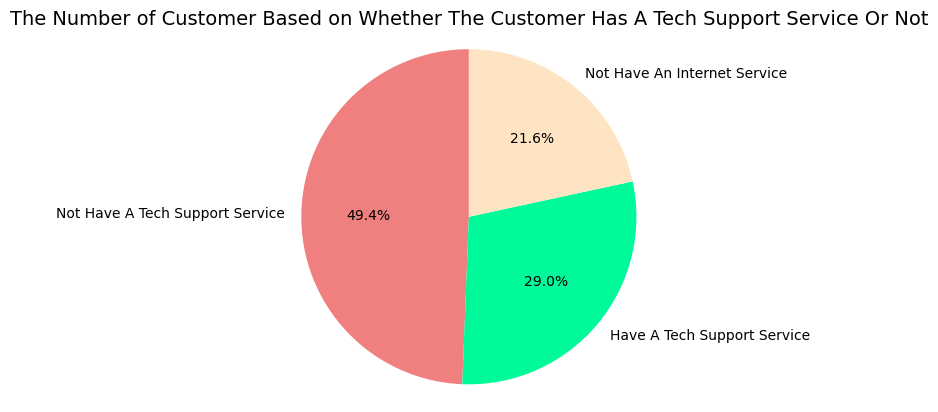

In [989]:
labels = df["TechSupport"].value_counts().index
sizes = df["TechSupport"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has A Tech Support Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of TechSupport Who Churned

In [990]:
TechSupport_churn = Amount("TechSupport", "Churn")
TechSupport_churn

,TechSupport,Churn,Amount
0,Have A Tech Support Service,Not Churned,1730
1,Not Have A Tech Support Service,Not Churned,2026
2,Not Have An Internet Service,Not Churned,1407
3,Have A Tech Support Service,Churned,310
4,Not Have A Tech Support Service,Churned,1446
5,Not Have An Internet Service,Churned,113


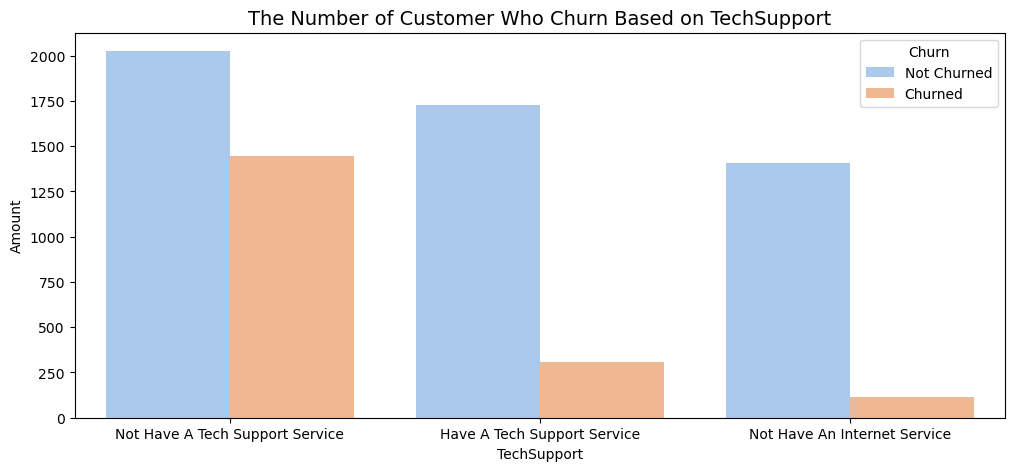

In [991]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["TechSupport"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on TechSupport", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("TechSupport", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on TechSupport

In [992]:
AmountGender("TechSupport")

,TechSupport,Gender,Amount
0,Have A Tech Support Service,Male,1016
1,Not Have A Tech Support Service,Male,1759
2,Not Have An Internet Service,Male,774
3,Have A Tech Support Service,Female,1024
4,Not Have A Tech Support Service,Female,1713
5,Not Have An Internet Service,Female,746


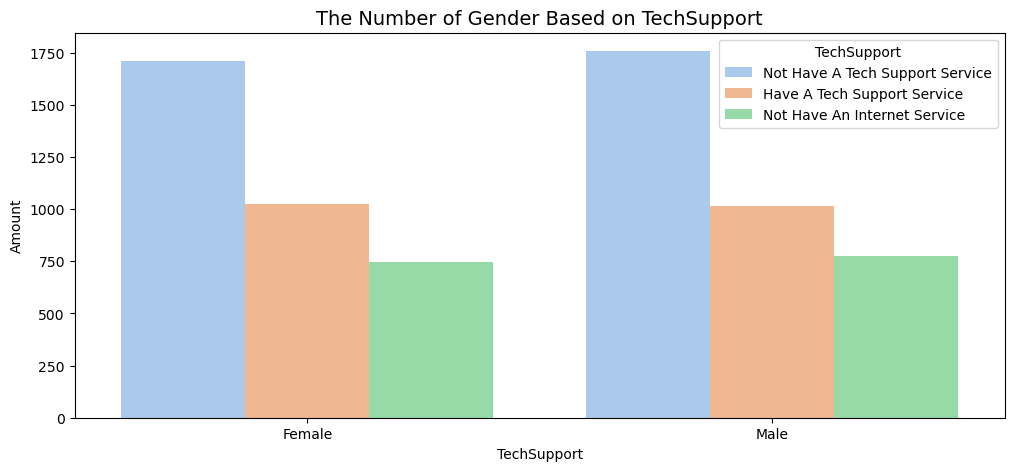

In [993]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["TechSupport"], palette = "pastel")
plt.title("The Number of Gender Based on TechSupport", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("TechSupport", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The StreamingTV

In [994]:
pd.DataFrame({'Amount' : df.groupby(["StreamingTV"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,StreamingTV,Amount
1,Not Have A Streaming TV Service,2809
0,Have A Streaming TV Service,2703
2,Not Have An Internet Service,1520


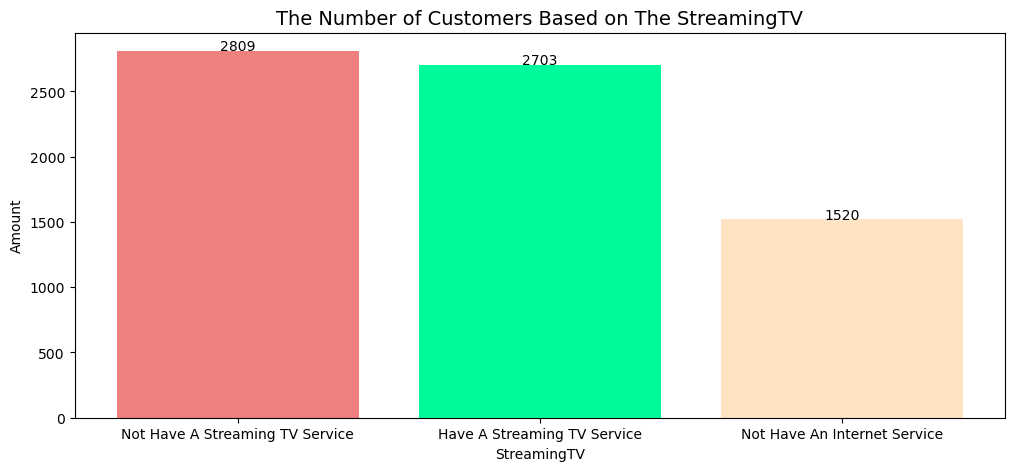

In [995]:
col = df["StreamingTV"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The StreamingTV", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("StreamingTV", fontsize = 10)
plt.text(x = 'Not Have A Streaming TV Service', y = 2811, s = "2809", ha='center',fontsize = 10)
plt.text(x = 'Have A Streaming TV Service', y = 2705, s = "2703", ha='center',fontsize = 10)
plt.text(x = 'Not Have An Internet Service', y = 1522, s = "1520", ha='center',fontsize = 10)
plt.show()

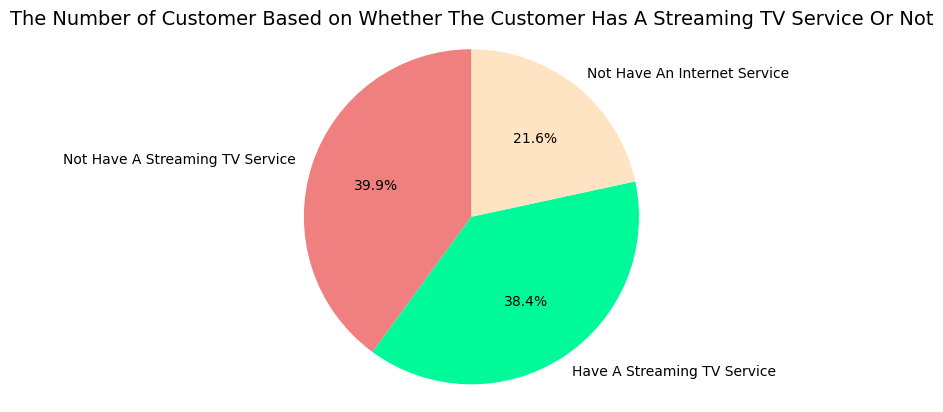

In [996]:
labels = df["StreamingTV"].value_counts().index
sizes = df["StreamingTV"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has A Streaming TV Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of StreamingTV Who Churned

In [997]:
StreamingTV_churn = Amount("StreamingTV", "Churn")
StreamingTV_churn

,StreamingTV,Churn,Amount
0,Have A Streaming TV Service,Not Churned,1889
1,Not Have A Streaming TV Service,Not Churned,1867
2,Not Have An Internet Service,Not Churned,1407
3,Have A Streaming TV Service,Churned,814
4,Not Have A Streaming TV Service,Churned,942
5,Not Have An Internet Service,Churned,113


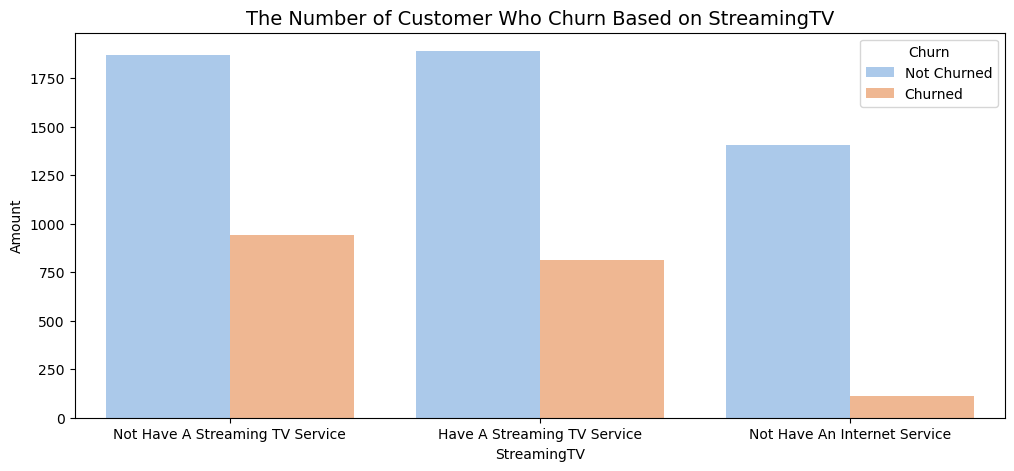

In [998]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["StreamingTV"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on StreamingTV", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("StreamingTV", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on StreamingTV

In [999]:
AmountGender("StreamingTV")

,StreamingTV,Gender,Amount
0,Have A Streaming TV Service,Male,1352
1,Not Have A Streaming TV Service,Male,1423
2,Not Have An Internet Service,Male,774
3,Have A Streaming TV Service,Female,1351
4,Not Have A Streaming TV Service,Female,1386
5,Not Have An Internet Service,Female,746


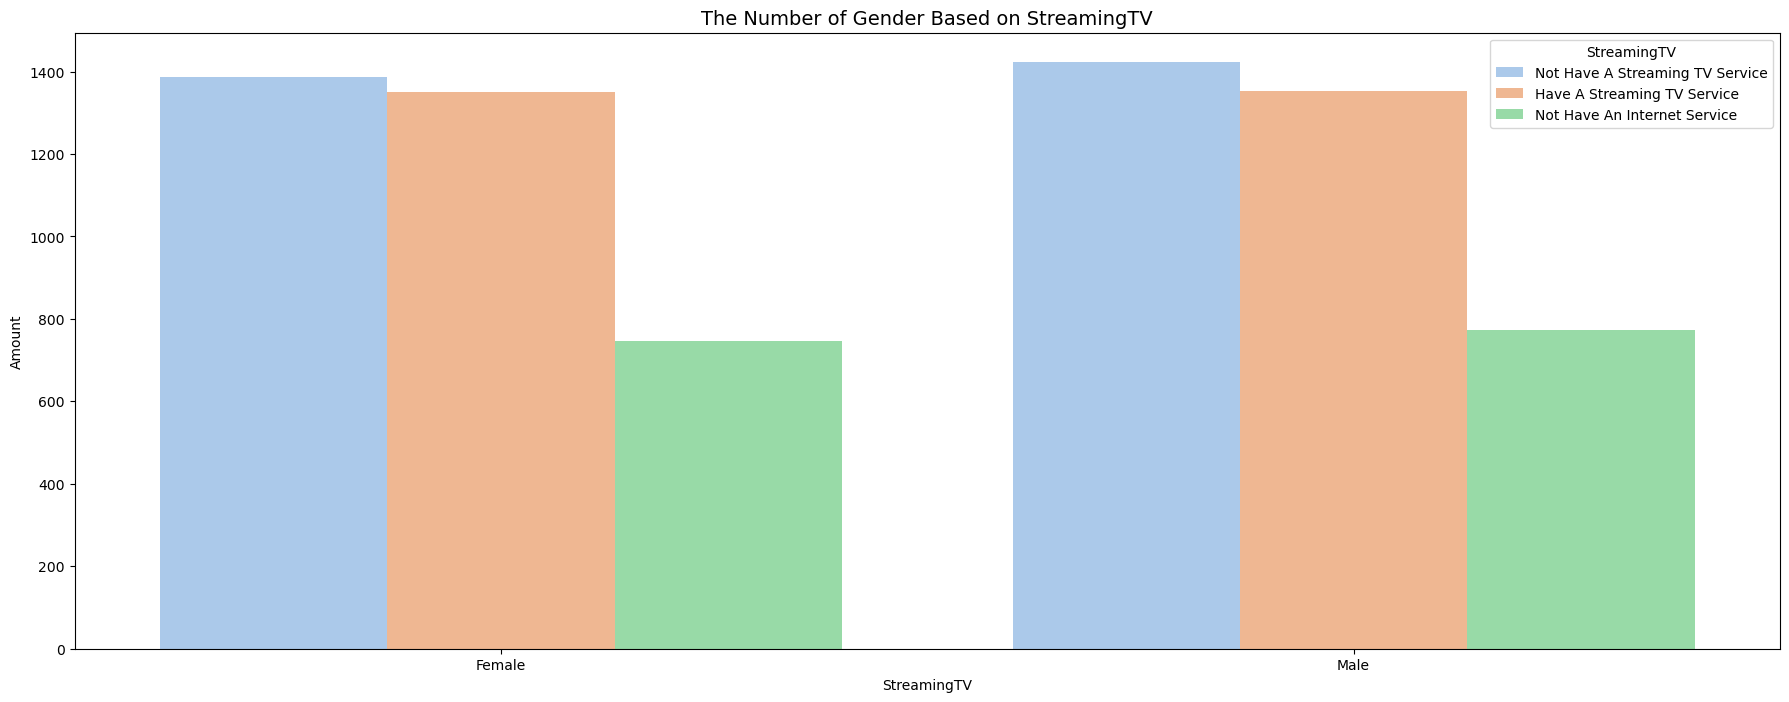

In [1000]:
plt.figure(figsize = (22, 8))
sns.countplot(data = df, x = df["Gender"], hue = df["StreamingTV"], palette = "pastel")
plt.title("The Number of Gender Based on StreamingTV", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("StreamingTV", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The StreamingMovies

In [1001]:
pd.DataFrame({'Amount' : df.groupby(["StreamingMovies"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,StreamingMovies,Amount
1,Not Have A Streaming Movies Service,2781
0,Have A Streaming Movies Service,2731
2,Not Have An Internet Service,1520


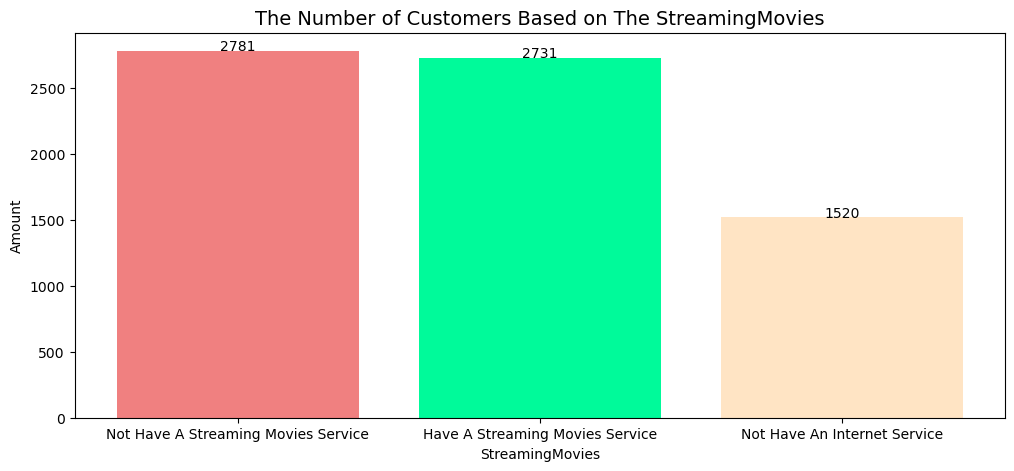

In [1002]:
col = df["StreamingMovies"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The StreamingMovies", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("StreamingMovies", fontsize = 10)
plt.text(x = 'Not Have A Streaming Movies Service', y = 2783, s = "2781", ha='center',fontsize = 10)
plt.text(x = 'Have A Streaming Movies Service', y = 2733, s = "2731", ha='center',fontsize = 10)
plt.text(x = 'Not Have An Internet Service', y = 1522, s = "1520", ha='center',fontsize = 10)
plt.show()

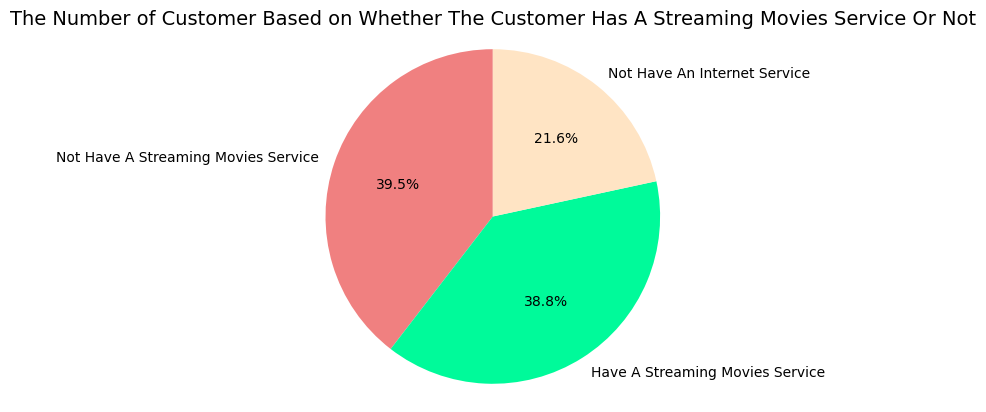

In [1003]:
labels = df["StreamingMovies"].value_counts().index
sizes = df["StreamingMovies"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has A Streaming Movies Service Or Not", fontsize = 14)
plt.show()

### Looking For The Number of StreamingMovies Who Churned

In [1004]:
StreamingMovies_churn = Amount("StreamingMovies", "Churn")
StreamingMovies_churn

,StreamingMovies,Churn,Amount
0,Have A Streaming Movies Service,Not Churned,1913
1,Not Have A Streaming Movies Service,Not Churned,1843
2,Not Have An Internet Service,Not Churned,1407
3,Have A Streaming Movies Service,Churned,818
4,Not Have A Streaming Movies Service,Churned,938
5,Not Have An Internet Service,Churned,113


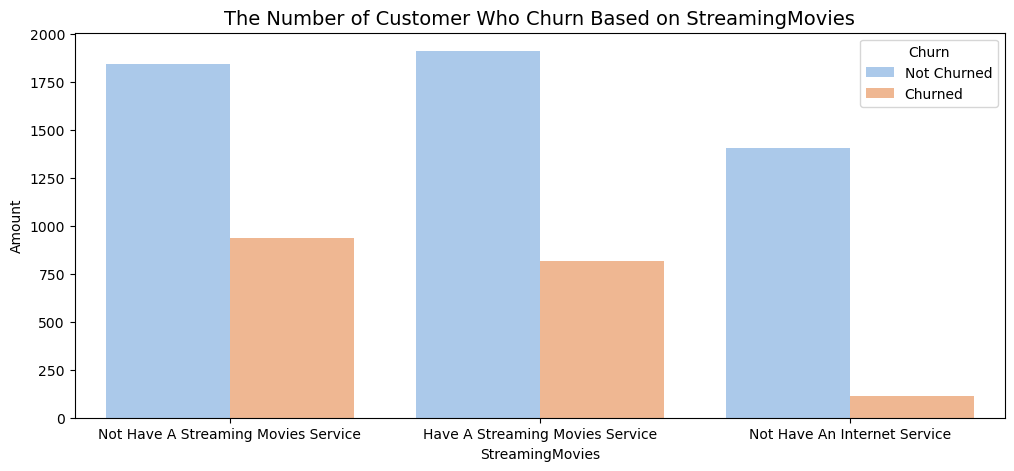

In [1005]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["StreamingMovies"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on StreamingMovies", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("StreamingMovies", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on StreamingMovies

In [1006]:
AmountGender("StreamingMovies")

,StreamingMovies,Gender,Amount
0,Have A Streaming Movies Service,Male,1361
1,Not Have A Streaming Movies Service,Male,1414
2,Not Have An Internet Service,Male,774
3,Have A Streaming Movies Service,Female,1370
4,Not Have A Streaming Movies Service,Female,1367
5,Not Have An Internet Service,Female,746


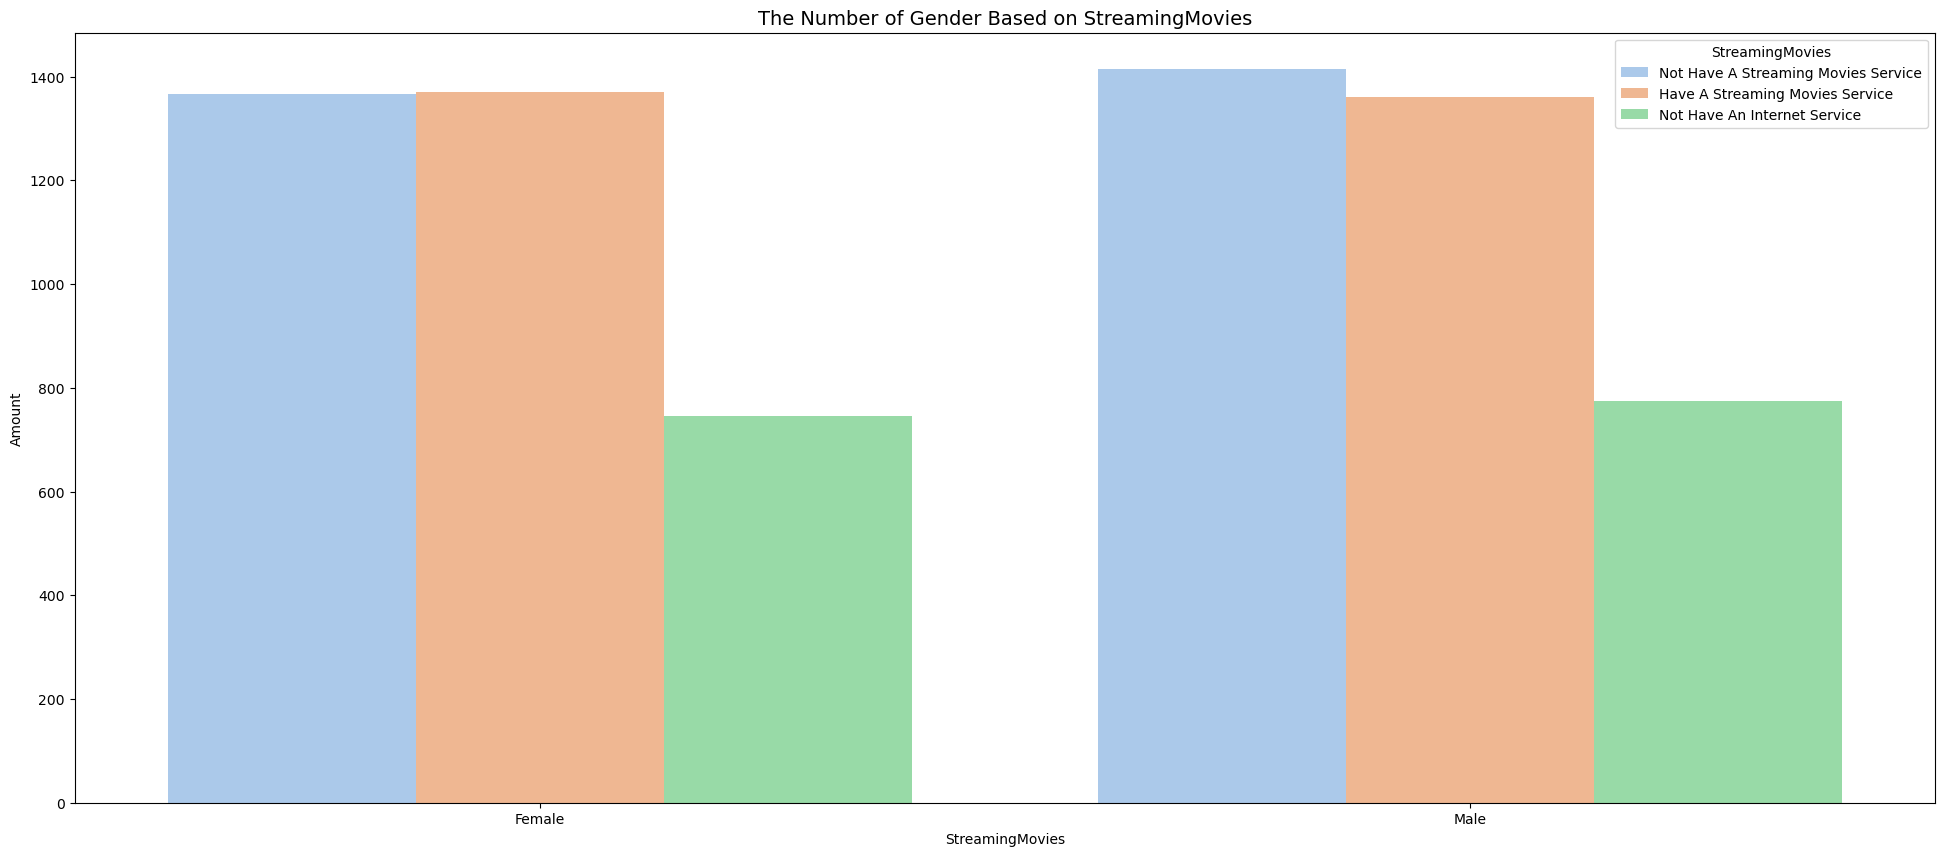

In [1007]:
plt.figure(figsize = (24, 10))
sns.countplot(data = df, x = df["Gender"], hue = df["StreamingMovies"], palette = "pastel")
plt.title("The Number of Gender Based on StreamingMovies", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("StreamingMovies", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The Contract

In [1008]:
pd.DataFrame({'Amount' : df.groupby(["Contract"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,Contract,Amount
0,Month-To-Month,3875
2,Two Year,1685
1,One Year,1472


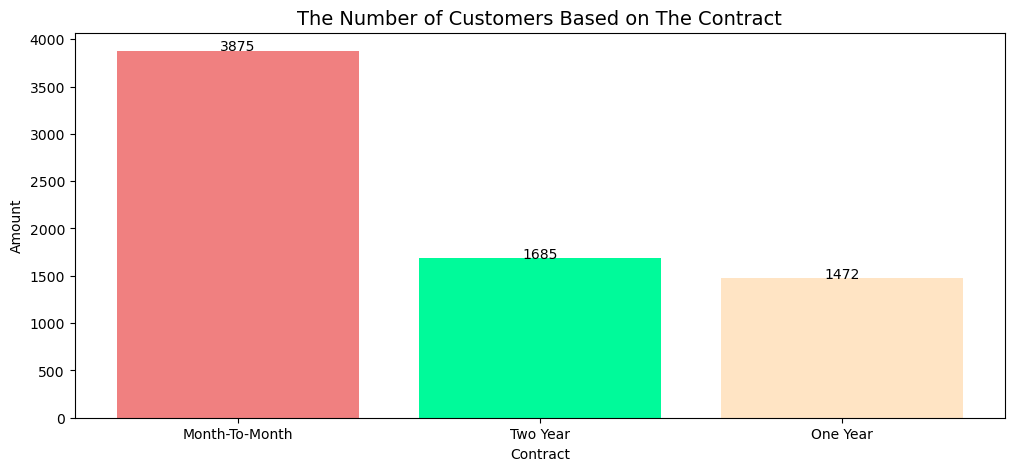

In [1009]:
col = df["Contract"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The Contract", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Contract", fontsize = 10)
plt.text(x = 'Month-To-Month', y = 3877, s = "3875", ha='center',fontsize = 10)
plt.text(x = 'Two Year', y = 1687, s = "1685", ha='center',fontsize = 10)
plt.text(x = 'One Year', y = 1474, s = "1472", ha='center',fontsize = 10)
plt.show()

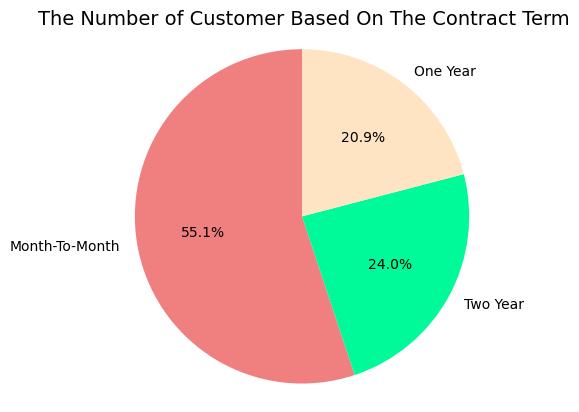

In [1010]:
labels = df["Contract"].value_counts().index
sizes = df["Contract"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based On The Contract Term", fontsize = 14)
plt.show()

### Looking For The Number of Contract Who Churned

In [1011]:
Contract_churn = Amount("Contract", "Churn")
Contract_churn

,Contract,Churn,Amount
0,Month-To-Month,Not Churned,2220
1,One Year,Not Churned,1306
2,Two Year,Not Churned,1637
3,Month-To-Month,Churned,1655
4,One Year,Churned,166
5,Two Year,Churned,48


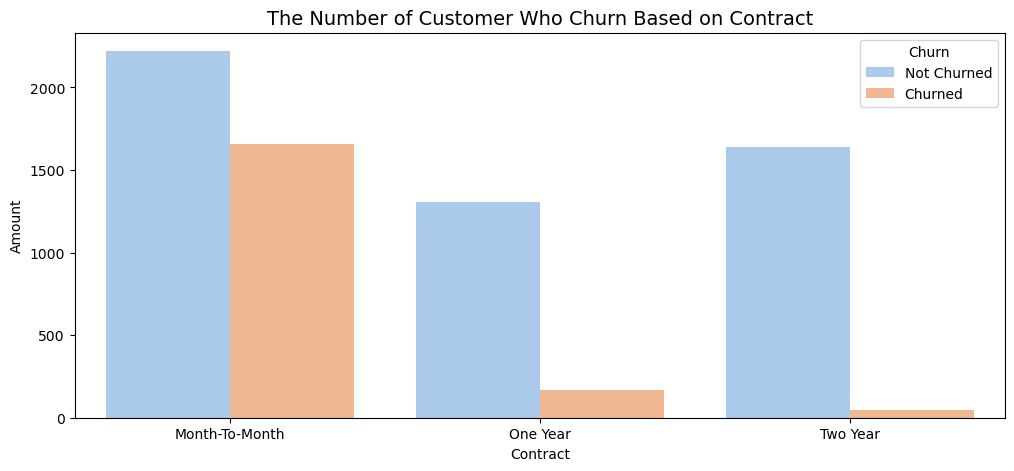

In [1012]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Contract"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on Contract", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Contract", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on Contract

In [1013]:
AmountGender("Contract")

,Contract,Gender,Amount
0,Month-To-Month,Male,1950
1,One Year,Male,754
2,Two Year,Male,845
3,Month-To-Month,Female,1925
4,One Year,Female,718
5,Two Year,Female,840


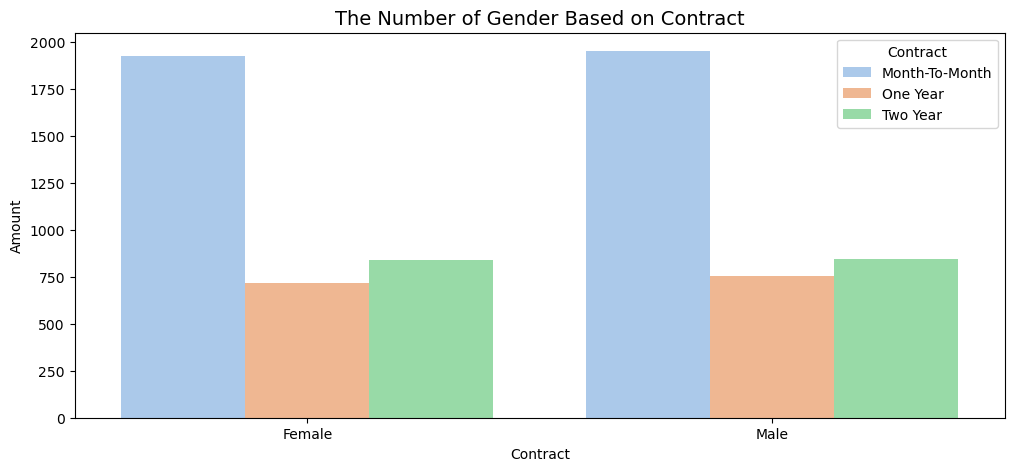

In [1014]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["Contract"], palette = "pastel")
plt.title("The Number of Gender Based on Contract", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("Contract", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The PaperlessBilling

In [1015]:
pd.DataFrame({'Amount' : df.groupby(["PaperlessBilling"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,PaperlessBilling,Amount
0,Have A Paperless Billing,4168
1,Not Have A Paperless Billing,2864


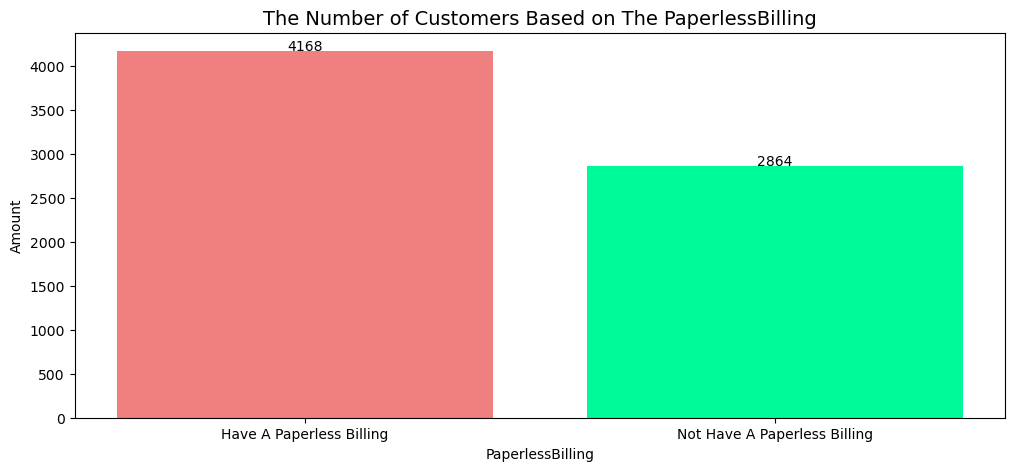

In [1016]:
col = df["PaperlessBilling"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The PaperlessBilling", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PaperlessBilling", fontsize = 10)
plt.text(x = 'Have A Paperless Billing', y = 4170, s = "4168", ha='center',fontsize = 10)
plt.text(x = 'Not Have A Paperless Billing', y = 2866, s = "2864", ha='center',fontsize = 10)
plt.show()

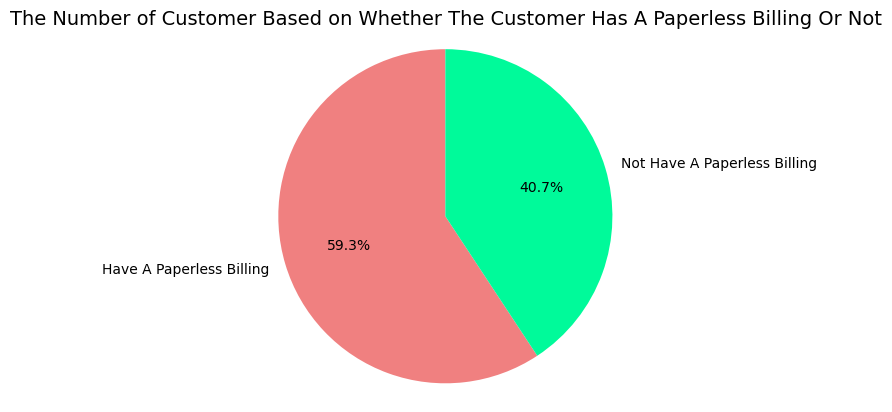

In [1017]:
labels = df["PaperlessBilling"].value_counts().index
sizes = df["PaperlessBilling"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on Whether The Customer Has A Paperless Billing Or Not", fontsize = 14)
plt.show()

### Looking For The Number of PaperlessBilling Who Churned

In [1018]:
PaperlessBilling_churn = Amount("PaperlessBilling", "Churn")
PaperlessBilling_churn

,PaperlessBilling,Churn,Amount
0,Have A Paperless Billing,Not Churned,2768
1,Not Have A Paperless Billing,Not Churned,2395
2,Have A Paperless Billing,Churned,1400
3,Not Have A Paperless Billing,Churned,469


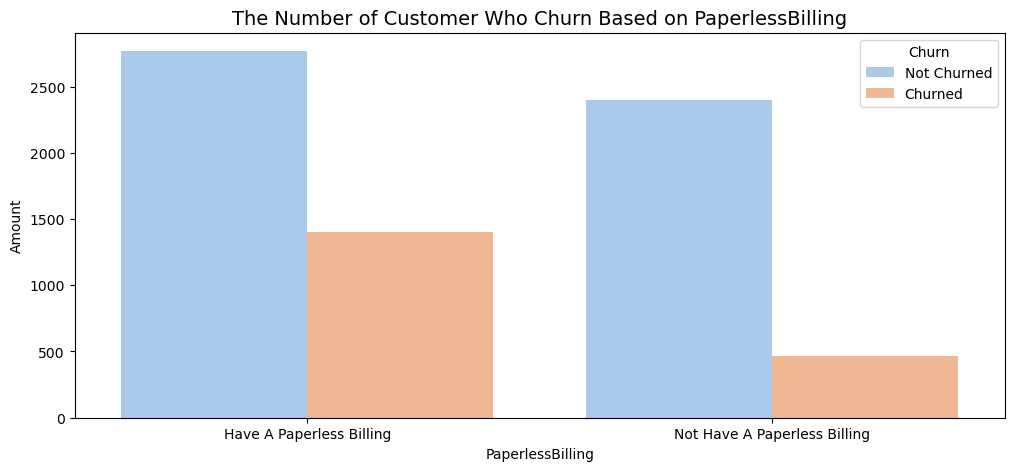

In [1019]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["PaperlessBilling"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on PaperlessBilling", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PaperlessBilling", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on PaperlessBilling

In [1020]:
AmountGender("PaperlessBilling")

,PaperlessBilling,Gender,Amount
0,Have A Paperless Billing,Male,2083
1,Not Have A Paperless Billing,Male,1466
2,Have A Paperless Billing,Female,2085
3,Not Have A Paperless Billing,Female,1398


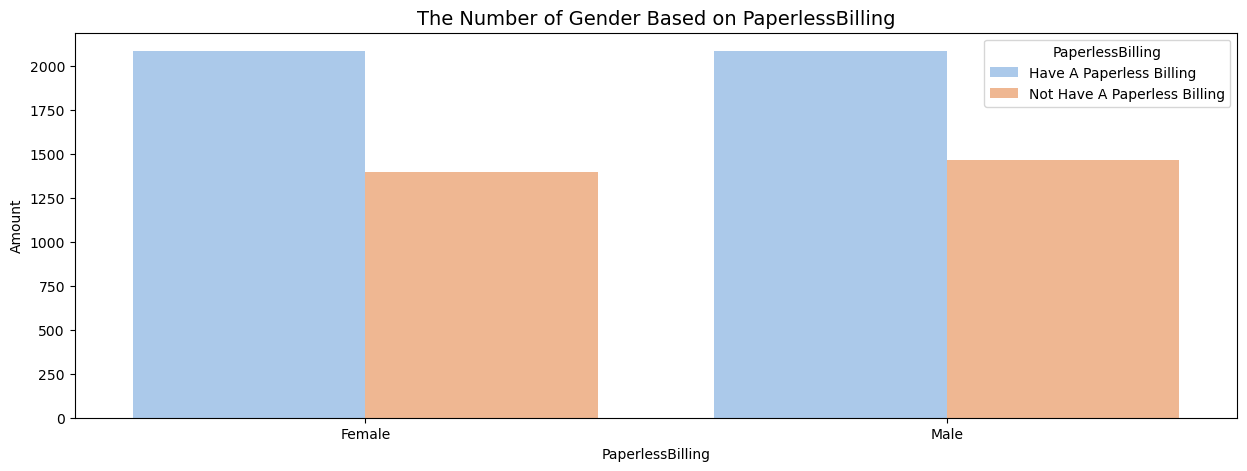

In [1021]:
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["PaperlessBilling"], palette = "pastel")
plt.title("The Number of Gender Based on PaperlessBilling", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PaperlessBilling", fontsize = 10)
plt.show()

### Checking The Number of Customers Based on The PaymentMethod

In [1022]:
pd.DataFrame({'Amount' : df.groupby(["PaymentMethod"]).size()}).reset_index().sort_values(by= 'Amount', ascending=False)

,PaymentMethod,Amount
2,Electronic Check,2365
3,Mailed Check,1604
0,Bank Transfer (Automatic),1542
1,Credit Card (Automatic),1521


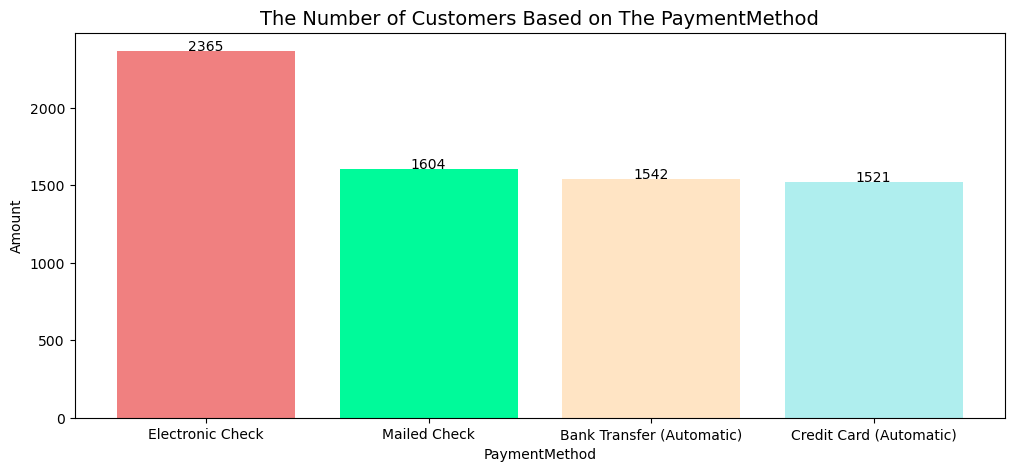

In [1023]:
col = df["PaymentMethod"]
colValue = col.value_counts()

plt.figure(figsize = (12, 5))
plt.bar(colValue.index, colValue, color = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
plt.xticks(colValue.index, colValue.index.values)
plt.title("The Number of Customers Based on The PaymentMethod", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PaymentMethod", fontsize = 10)
plt.text(x = 'Electronic Check', y = 2367, s = "2365", ha='center',fontsize = 10)
plt.text(x = 'Mailed Check', y = 1606, s = "1604", ha='center',fontsize = 10)
plt.text(x = 'Bank Transfer (Automatic)', y = 1544, s = "1542", ha='center',fontsize = 10)
plt.text(x = 'Credit Card (Automatic)', y = 1523, s = "1521", ha='center',fontsize = 10)
plt.show()

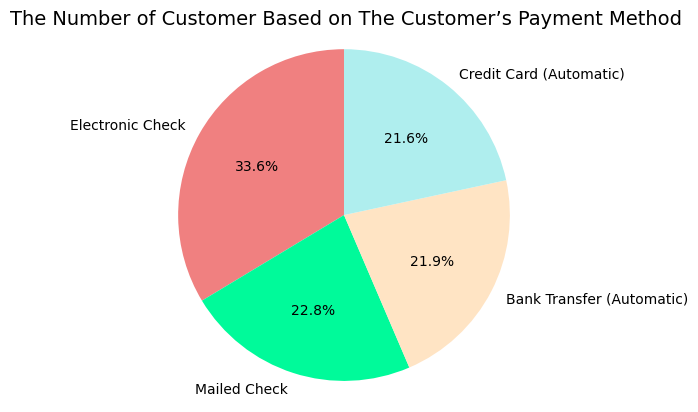

In [1024]:
labels = df["PaymentMethod"].value_counts().index
sizes = df["PaymentMethod"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ["lightcoral", "mediumspringgreen", "bisque", "paleturquoise", "plum", "ivory"])
ax1.axis('equal')
plt.title("The Number of Customer Based on The Customer’s Payment Method", fontsize = 14)
plt.show()

### Looking For The Number of PaymentMethod Who Churned

In [1025]:
PaymentMethod_churn = Amount("PaymentMethod", "Churn")
PaymentMethod_churn

,PaymentMethod,Churn,Amount
0,Bank Transfer (Automatic),Not Churned,1284
1,Credit Card (Automatic),Not Churned,1289
2,Electronic Check,Not Churned,1294
3,Mailed Check,Not Churned,1296
4,Bank Transfer (Automatic),Churned,258
5,Credit Card (Automatic),Churned,232
6,Electronic Check,Churned,1071
7,Mailed Check,Churned,308


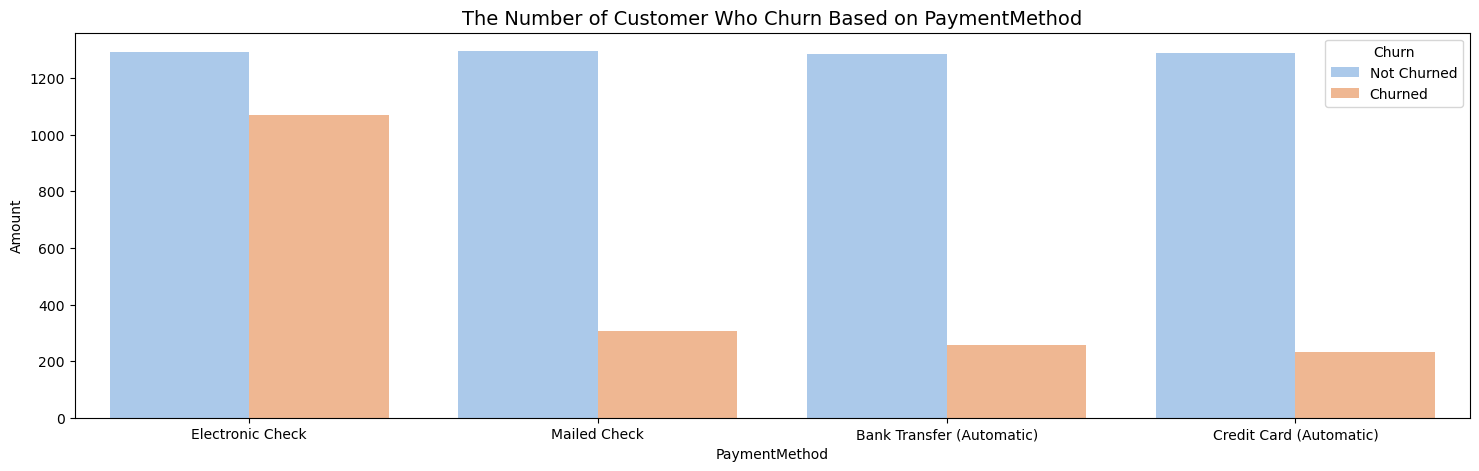

In [1026]:
plt.figure(figsize = (18, 5))
sns.countplot(data = df, x = df["PaymentMethod"], hue = df["Churn"], palette = "pastel")
plt.title("The Number of Customer Who Churn Based on PaymentMethod", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PaymentMethod", fontsize = 10)
plt.show()

### Looking For The Number of Gender Based on PaymentMethod

In [1027]:
AmountGender("PaymentMethod")

,PaymentMethod,Gender,Amount
0,Bank Transfer (Automatic),Male,755
1,Credit Card (Automatic),Male,770
2,Electronic Check,Male,1195
3,Mailed Check,Male,829
4,Bank Transfer (Automatic),Female,787
5,Credit Card (Automatic),Female,751
6,Electronic Check,Female,1170
7,Mailed Check,Female,775


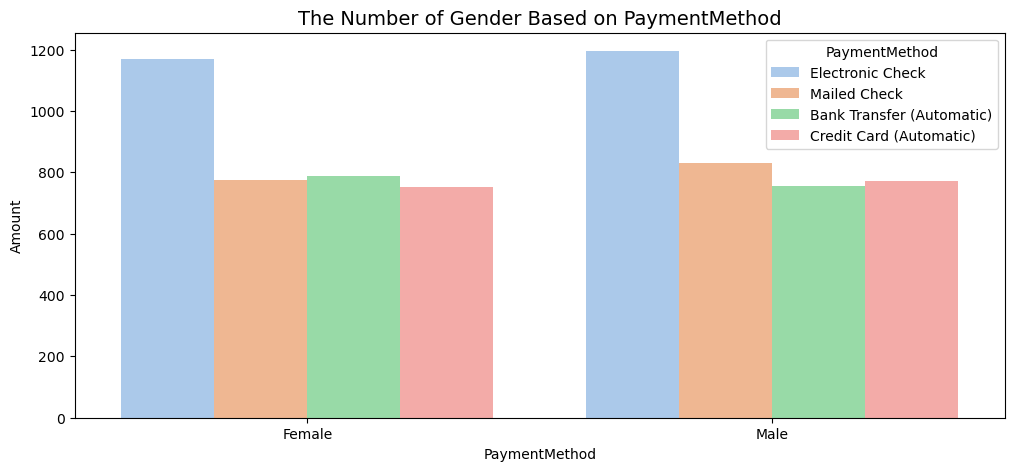

In [1028]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = df["Gender"], hue = df["PaymentMethod"], palette = "pastel")
plt.title("The Number of Gender Based on PaymentMethod", fontsize = 14)
plt.ylabel("Amount", fontsize = 10)
plt.xlabel("PaymentMethod", fontsize = 10)
plt.show()

### Checking The Monthly Charges Column

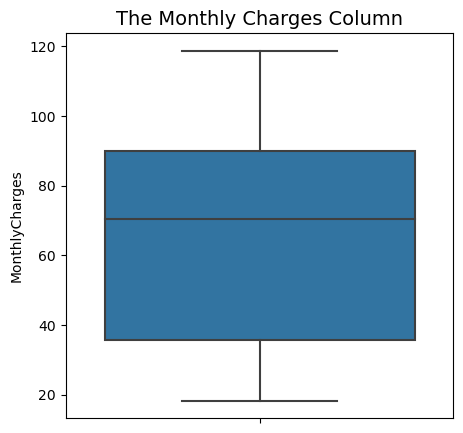

In [1029]:
plt.figure(figsize=(5, 5))
sns.boxplot(y = df['MonthlyCharges'])
plt.title("The Monthly Charges Column", fontsize = 14)
plt.show()

### The Average of Monthly Charge Based on Gender

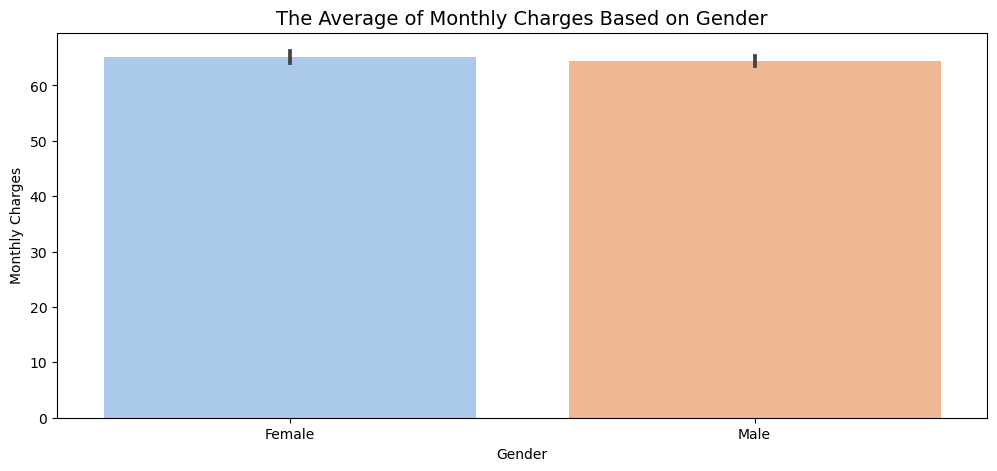

In [1030]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Gender", y = "MonthlyCharges", palette = "pastel")
plt.title("The Average of Monthly Charges Based on Gender", fontsize = 14)
plt.ylabel("Monthly Charges", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### The Average of Monthly Charge Based on Senior Citizen

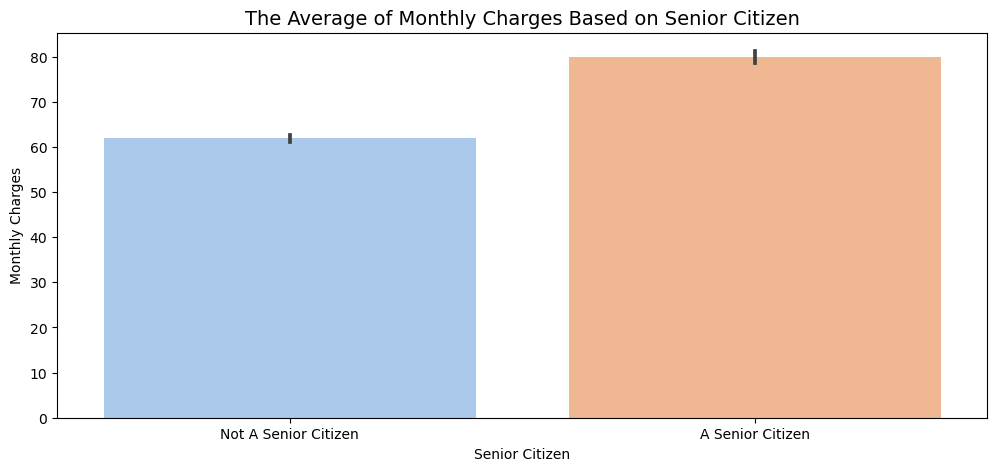

In [1031]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "SeniorCitizen", y = "MonthlyCharges", palette = "pastel")
plt.title("The Average of Monthly Charges Based on Senior Citizen", fontsize = 14)
plt.ylabel("Monthly Charges", fontsize = 10)
plt.xlabel("Senior Citizen", fontsize = 10)
plt.show()

### Checking The Total Charges Column

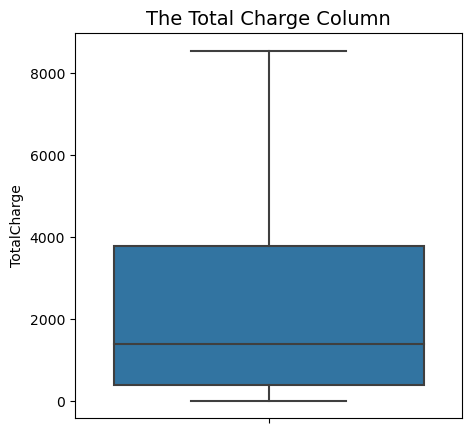

In [1032]:
plt.figure(figsize=(5, 5))
sns.boxplot(y = df['TotalCharge'])
plt.title("The Total Charge Column", fontsize = 14)
plt.show()

### The Average of Total Charge Based on Gender

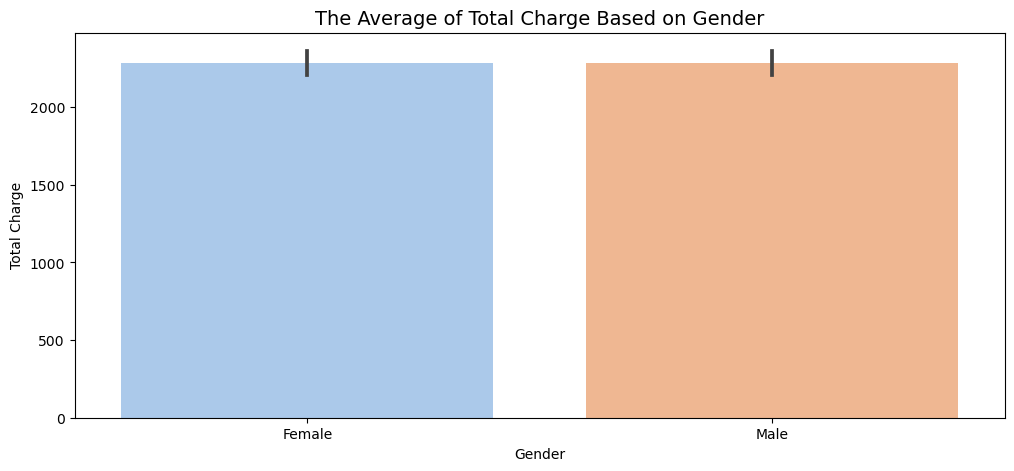

In [1033]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Gender", y = "TotalCharge", palette = "pastel")
plt.title("The Average of Total Charge Based on Gender", fontsize = 14)
plt.ylabel("Total Charge", fontsize = 10)
plt.xlabel("Gender", fontsize = 10)
plt.show()

### The Average of Total Charge Based on Senior Citizen

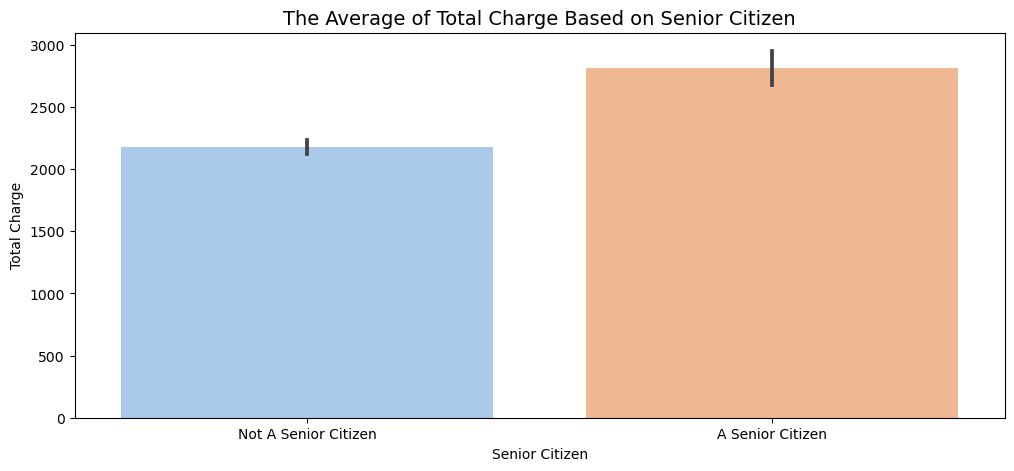

In [1034]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "SeniorCitizen", y = "TotalCharge", palette = "pastel")
plt.title("The Average of Total Charge Based on Senior Citizen", fontsize = 14)
plt.ylabel("Total Charge", fontsize = 10)
plt.xlabel("Senior Citizen", fontsize = 10)
plt.show()

### Checking The Outliers

Outliers are extreme values that stand out significantly from the overall pattern of values in a dataset or graph.

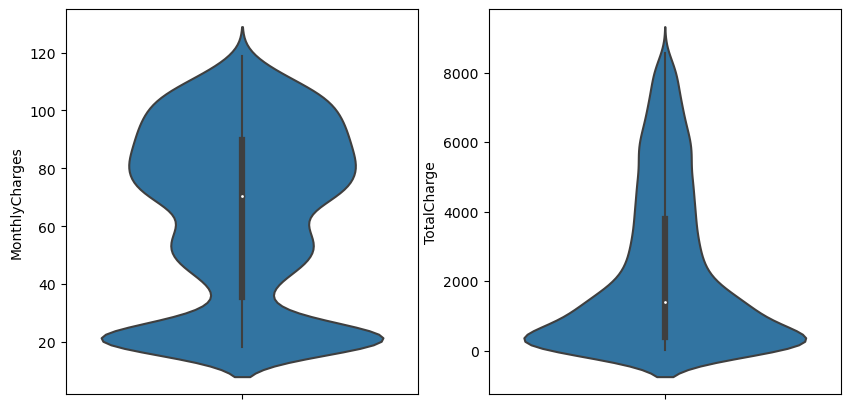

In [1035]:
nums = ['MonthlyCharges', 'TotalCharge']

from matplotlib.gridspec import GridSpec    
fig = plt.figure(figsize=(10, 5))
grid = GridSpec(ncols=2, nrows=1, figure=fig)
for i, name in enumerate(nums):
    ax = fig.add_subplot(grid[i])
    sns.violinplot(y = df[nums[i]], orient='v')
plt.show()